In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
data_2014_add = pd.read_csv(filepath_or_buffer="2014_add.csv", encoding="utf-8", sep=",")
data_condition = pd.read_csv(filepath_or_buffer="condition.csv", encoding="utf-8", sep=",")
data_condition_add = pd.read_csv(filepath_or_buffer="condition_add.csv", encoding="utf-8", sep=",")
data_sample_submit = pd.read_csv(filepath_or_buffer="sample_submit.csv", encoding="utf-8", sep=",")
data_stadium = pd.read_csv(filepath_or_buffer="stadium.csv", encoding="utf-8", sep=",")
test2 = pd.read_csv(filepath_or_buffer="test-2.csv", encoding="utf-8", sep=",")
train2 = pd.read_csv(filepath_or_buffer="train-2.csv", encoding="utf-8", sep=",")
train_add = pd.read_csv(filepath_or_buffer="train_add.csv", encoding="utf-8", sep=",")

In [102]:
dat_condition = pd.concat([data_condition,data_condition_add])

In [103]:
train = pd.concat([train2,train_add])

In [104]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [105]:
df = pd.merge(train , dat_condition ,on = "id")

In [106]:
df.shape

(1953, 41)

In [107]:
data_stadium2 = pd.read_csv(filepath_or_buffer="stadium.csv", encoding="utf-8", sep=",")
data_stadium2 = data_stadium2.rename(columns={"name":"stadium", "address":"address","capa":"capa"})

all_df = pd.merge(df ,data_stadium2 , on="stadium" )

In [108]:
all_df

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,ベガルタ仙台,大宮アルディージャ,ユアテックスタジアム仙台,...,金 英權,下平 匠,青木 拓矢,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,宮城県仙台市泉区七北田字柳78,19694
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,ベガルタ仙台,ジュビロ磐田,ユアテックスタジアム仙台,...,藤田 義明,宮崎 智彦,山本 康裕,小林 裕紀,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,宮城県仙台市泉区七北田字柳78,19694
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,ベガルタ仙台,ＦＣ東京,ユアテックスタジアム仙台,...,チャン ヒョンス,太田 宏介,高橋 秀人,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,宮城県仙台市泉区七北田字柳78,19694
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,ベガルタ仙台,清水エスパルス,ユアテックスタジアム仙台,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,アレックス,河井 陽介,ジミー フランサ,大前 元紀,高木 俊幸,宮城県仙台市泉区七北田字柳78,19694
5,14111,13554,2012,Ｊ１,第１４節第１日,06/16(土),13:33,ベガルタ仙台,コンサドーレ札幌,ユアテックスタジアム仙台,...,岡山 一成,高木 純平,山本 真希,河合 竜二,砂川 誠,近藤 祐介,岡本 賢明,大島 秀夫,宮城県仙台市泉区七北田字柳78,19694
6,14130,18722,2012,Ｊ１,第１６節第１日,06/30(土),18:34,ベガルタ仙台,サンフレッチェ広島,ユアテックスタジアム仙台,...,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,清水 航平,石原 直樹,髙萩 洋次郎,佐藤 寿人,宮城県仙台市泉区七北田字柳78,19694
7,14158,14611,2012,Ｊ１,第１９節第１日,07/28(土),18:34,ベガルタ仙台,サガン鳥栖,ユアテックスタジアム仙台,...,呂 成海,磯崎 敬太,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,豊田 陽平,宮城県仙台市泉区七北田字柳78,19694
8,14166,17935,2012,Ｊ１,第２０節第１日,08/04(土),18:34,ベガルタ仙台,横浜Ｆ・マリノス,ユアテックスタジアム仙台,...,中澤 佑二,ドゥトラ,富澤 清太郎,兵藤 慎剛,中村 俊輔,小野 裕二,マルキーニョス,大黒 将志,宮城県仙台市泉区七北田字柳78,19694
9,14185,17715,2012,Ｊ１,第２２節第１日,08/18(土),19:04,ベガルタ仙台,柏レイソル,ユアテックスタジアム仙台,...,近藤 直也,橋本 和,水野 晃樹,茨田 陽生,大谷 秀和,ジョルジ ワグネル,工藤 壮人,ネット バイアーノ,宮城県仙台市泉区七北田字柳78,19694


In [109]:
all_df.shape

(1953, 43)

In [110]:
all_df["shuukyaku"] = all_df["y"] / all_df["capa"]

In [111]:
all_df.shape

(1953, 44)

In [112]:
all_df["shuukyaku"].head

<bound method NDFrame.head of 0       0.926678
1       0.600741
2       0.667564
3       0.872956
4       0.940642
5       0.688230
6       0.950645
7       0.741901
8       0.910683
9       0.899513
10      0.871281
11      0.787499
12      0.914136
13      0.899309
14      0.888240
15      0.940693
16      0.830354
17      0.671880
18      0.654159
19      0.727480
20      0.683965
21      0.727023
22      0.596882
23      0.729410
24      0.908500
25      0.766782
26      0.680969
27      0.906317
28      0.770692
29      0.883213
          ...   
1923    0.185568
1924    0.150548
1925    0.164971
1926    0.302331
1927    0.221179
1928    0.149709
1929    0.188630
1930    0.211894
1931    0.237133
1932    0.896622
1933    0.103378
1934    0.214166
1935    0.170503
1936    0.198360
1937    0.783488
1938    0.280626
1939    0.271747
1940    0.362396
1941    0.466514
1942    0.130540
1943    0.064912
1944    0.090205
1945    0.151670
1946    0.124093
1947    0.117558
1948    0.104217
1

In [113]:
print(18250/19694)
print(13994/19694)

0.9266781760942419
0.7105717477404285


In [114]:
all_df['match_sec'] = all_df['match'].apply(lambda x: int(x[1:].split('節')[0]))

In [115]:
all_df['time_hour'] = all_df['time'].apply(lambda x: int(x.split(':')[0]))

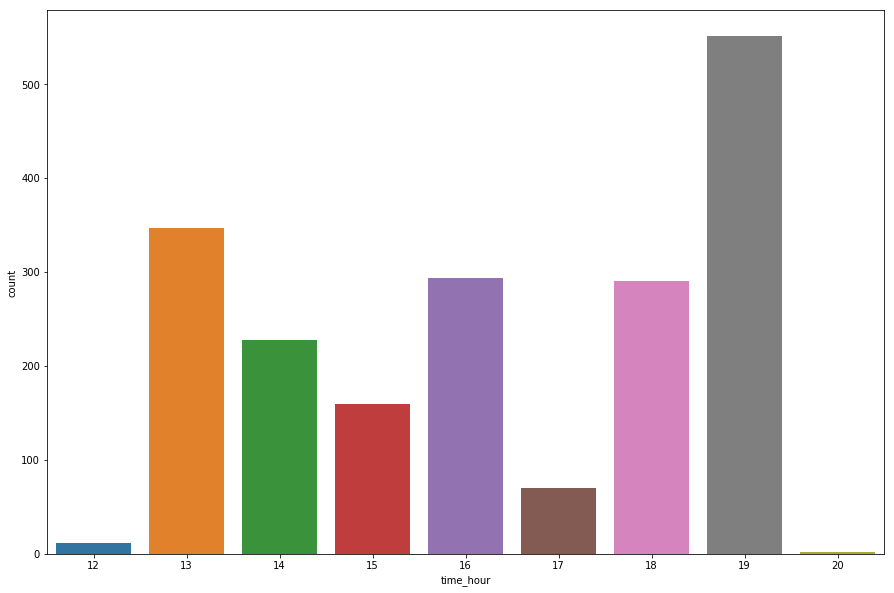

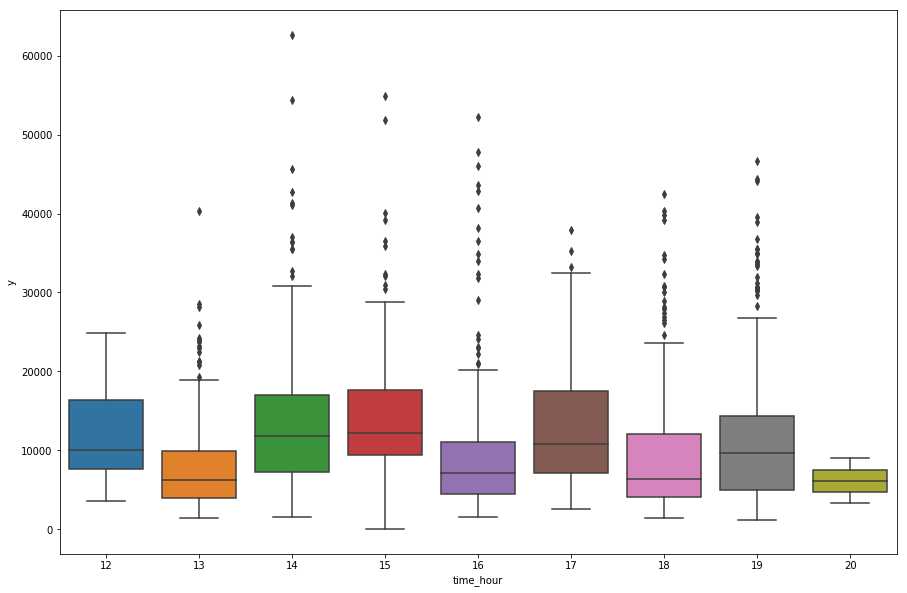

In [116]:
plt.figure(figsize=(15, 10))
sns.countplot(all_df['time_hour'])

plt.figure(figsize=(15,10))
sns.boxplot(x="time_hour",y="y",data=all_df)

#１２〜１４,15~17,18~で分けて考えてく。昼、夕、ナイター

In [117]:
#チーム名をマッピングする

In [118]:
team =all_df["home"].unique()

In [119]:
len(team)

43

In [120]:
team1 =all_df["away"].unique()

In [121]:
len(team1)

43

In [122]:
team_mapping = {name:i for(i,name) in enumerate(team)}

In [123]:
team_mapping

{'ベガルタ仙台': 0,
 '名古屋グランパス': 1,
 'ガンバ大阪': 2,
 'サンフレッチェ広島': 3,
 'コンサドーレ札幌': 4,
 'サガン鳥栖': 5,
 '川崎フロンターレ': 6,
 '大宮アルディージャ': 7,
 '柏レイソル': 8,
 '浦和レッズ': 9,
 '横浜Ｆ・マリノス': 10,
 'アルビレックス新潟': 11,
 'セレッソ大阪': 12,
 '清水エスパルス': 13,
 'ジュビロ磐田': 14,
 'ヴィッセル神戸': 15,
 'ＦＣ東京': 16,
 '東京ヴェルディ': 17,
 '鹿島アントラーズ': 18,
 '横浜ＦＣ': 19,
 'ヴァンフォーレ甲府': 20,
 '水戸ホーリーホック': 21,
 'ＦＣ岐阜': 22,
 'ファジアーノ岡山': 23,
 'アビスパ福岡': 24,
 '大分トリニータ': 25,
 '愛媛ＦＣ': 26,
 '湘南ベルマーレ': 27,
 'ギラヴァンツ北九州': 28,
 '栃木ＳＣ': 29,
 'ＦＣ町田ゼルビア': 30,
 '松本山雅ＦＣ': 31,
 '徳島ヴォルティス': 32,
 'ザスパ草津': 33,
 'ザスパクサツ群馬': 34,
 'ロアッソ熊本': 35,
 '京都サンガF.C.': 36,
 'ガイナーレ鳥取': 37,
 'モンテディオ山形': 38,
 'カターレ富山': 39,
 'ジェフユナイテッド千葉': 40,
 'Ｖ・ファーレン長崎': 41,
 'カマタマーレ讃岐': 42}

In [124]:
all_df["home"] = all_df["home"].map(team_mapping)

In [125]:
all_df["home"].head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1923    41
1924    41
1925    41
1926    41
1927    41
1928    41
1929    41
1930    41
1931    41
1932    41
1933    41
1934    41
1935    41
1936    41
1937    22
1938    36
1939    36
1940    36
1941    42
1942    42
1943    42
1944    42
1945    42
1946    42
1947    42
1948    42
1949    42
1950    42
1951    42
1952    41
Name: home, Length: 1953, dtype: int64>

In [126]:
all_df["away"] = all_df["away"].map(team_mapping)

In [127]:
all_df["away"].head

<bound method NDFrame.head of 0       18
1        7
2       14
3       16
4       13
5        4
6        3
7        5
8       10
9        8
10       6
11      15
12       2
13       9
14      12
15      11
16      20
17       8
18      11
19       7
20      27
21      14
22       3
23       6
24      18
25      12
26      25
27      10
28       1
29      13
        ..
1923    40
1924    28
1925    26
1926    25
1927    21
1928    42
1929    38
1930     4
1931    31
1932     2
1933    39
1934    28
1935    40
1936    29
1937    37
1938    39
1939    41
1940    24
1941    14
1942    31
1943    29
1944    24
1945    17
1946    39
1947     4
1948    21
1949    22
1950    19
1951    38
1952    36
Name: away, Length: 1953, dtype: int64>

In [128]:
stadium =all_df["stadium"].unique()
stadium1 = {name:i for(i,name) in enumerate(stadium)}
all_df["stadium"] = all_df["stadium"].map(stadium1)

In [129]:
all_df["stadium"]

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
1923    54
1924    54
1925    54
1926    54
1927    54
1928    54
1929    54
1930    54
1931    54
1932    54
1933    54
1934    54
1935    54
1936    54
1937    55
1938    56
1939    56
1940    56
1941    57
1942    57
1943    57
1944    57
1945    57
1946    57
1947    57
1948    57
1949    57
1950    57
1951    57
1952    58
Name: stadium, Length: 1953, dtype: int64

In [130]:
len(stadium)

59

In [131]:
all_df.shape

(1953, 46)

In [132]:
all_df.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'shuukyaku', 'match_sec',
       'time_hour'],
      dtype='object')

In [133]:
all_df.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_07,away_08,away_09,away_10,away_11,address,capa,shuukyaku,match_sec,time_hour
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,0.926678,1,14
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,宮城県仙台市泉区七北田字柳78,19694,0.600741,3,13
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,小林 裕紀,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,宮城県仙台市泉区七北田字柳78,19694,0.667564,5,14
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,宮城県仙台市泉区七北田字柳78,19694,0.872956,7,19
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,アレックス,河井 陽介,ジミー フランサ,大前 元紀,高木 俊幸,宮城県仙台市泉区七北田字柳78,19694,0.940642,10,13


In [134]:
all_df

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_07,away_08,away_09,away_10,away_11,address,capa,shuukyaku,match_sec,time_hour
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,0.926678,1,14
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,宮城県仙台市泉区七北田字柳78,19694,0.600741,3,13
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,小林 裕紀,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,宮城県仙台市泉区七北田字柳78,19694,0.667564,5,14
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,宮城県仙台市泉区七北田字柳78,19694,0.872956,7,19
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,アレックス,河井 陽介,ジミー フランサ,大前 元紀,高木 俊幸,宮城県仙台市泉区七北田字柳78,19694,0.940642,10,13
5,14111,13554,2012,Ｊ１,第１４節第１日,06/16(土),13:33,0,4,0,...,河合 竜二,砂川 誠,近藤 祐介,岡本 賢明,大島 秀夫,宮城県仙台市泉区七北田字柳78,19694,0.688230,14,13
6,14130,18722,2012,Ｊ１,第１６節第１日,06/30(土),18:34,0,3,0,...,森﨑 和幸,清水 航平,石原 直樹,髙萩 洋次郎,佐藤 寿人,宮城県仙台市泉区七北田字柳78,19694,0.950645,16,18
7,14158,14611,2012,Ｊ１,第１９節第１日,07/28(土),18:34,0,5,0,...,岡本 知剛,藤田 直之,金 民友,池田 圭,豊田 陽平,宮城県仙台市泉区七北田字柳78,19694,0.741901,19,18
8,14166,17935,2012,Ｊ１,第２０節第１日,08/04(土),18:34,0,10,0,...,兵藤 慎剛,中村 俊輔,小野 裕二,マルキーニョス,大黒 将志,宮城県仙台市泉区七北田字柳78,19694,0.910683,20,18
9,14185,17715,2012,Ｊ１,第２２節第１日,08/18(土),19:04,0,8,0,...,茨田 陽生,大谷 秀和,ジョルジ ワグネル,工藤 壮人,ネット バイアーノ,宮城県仙台市泉区七北田字柳78,19694,0.899513,22,19


In [135]:
all_df["weather"].unique()

array(['雨', '曇時々雨', '曇', '晴', '曇のち雨', '曇一時雨', '晴時々雪', '晴のち雨', '屋内',
       '晴一時雨', '雨時々曇', '晴時々曇', '曇のち晴', '晴のち曇', '雨のち曇時々晴', '雨のち曇',
       '曇時々晴一時雨', '曇一時雨のち晴', '曇時々晴', '晴のち曇一時雨', '晴一時曇', '雨時々晴',
       '曇一時雷雨のち曇', '曇のち雷雨', '雨のち晴', '曇時々雨のち晴', '曇一時晴一時雨', '晴時々雨',
       '晴のち曇時々雨', '雪のち雨', '曇のち雪', '雪', '曇一時晴'], dtype=object)

In [136]:
x = all_df["temperature"]
y = all_df["shuukyaku"]

np.corrcoef(x,y)

array([[1.        , 0.01104607],
       [0.01104607, 1.        ]])

In [137]:
print(x.shape)
print(y.shape)

(1953,)
(1953,)


In [138]:
dat = pd.concat([x,y],axis=1)

In [139]:
dat

,temperature,shuukyaku
0,3.8,0.926678
1,8.9,0.600741
2,6.1,0.667564
3,10.4,0.872956
4,16.9,0.940642
5,19.1,0.688230
6,20.4,0.950645
7,27.6,0.741901
8,25.9,0.910683
9,26.9,0.899513


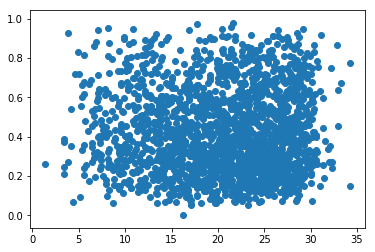

In [140]:
plt.scatter(x,y)

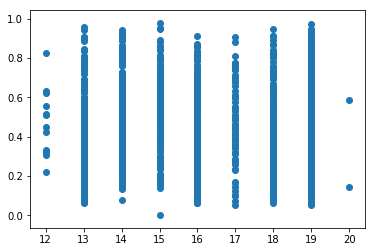

In [141]:
plt.scatter(all_df.time_hour,y)

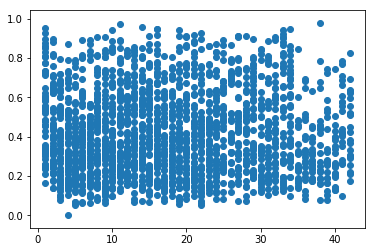

In [142]:
plt.scatter(all_df.match_sec,y)

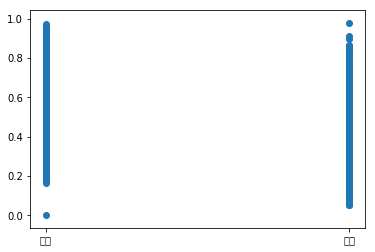

In [143]:
plt.scatter(all_df.stage,y)

{'ベガルタ仙台': 0, '名古屋グランパス': 1, 'ガンバ大阪': 2, 'サンフレッチェ広島': 3, 'コンサドーレ札幌': 4, 'サガン鳥栖': 5, '川崎フロンターレ': 6, '大宮アルディージャ': 7, '柏レイソル': 8, '浦和レッズ': 9, '横浜Ｆ・マリノス': 10, 'アルビレックス新潟': 11, 'セレッソ大阪': 12, '清水エスパルス': 13, 'ジュビロ磐田': 14, 'ヴィッセル神戸': 15, 'ＦＣ東京': 16, '東京ヴェルディ': 17, '鹿島アントラーズ': 18, '横浜ＦＣ': 19, 'ヴァンフォーレ甲府': 20, '水戸ホーリーホック': 21, 'ＦＣ岐阜': 22, 'ファジアーノ岡山': 23, 'アビスパ福岡': 24, '大分トリニータ': 25, '愛媛ＦＣ': 26, '湘南ベルマーレ': 27, 'ギラヴァンツ北九州': 28, '栃木ＳＣ': 29, 'ＦＣ町田ゼルビア': 30, '松本山雅ＦＣ': 31, '徳島ヴォルティス': 32, 'ザスパ草津': 33, 'ザスパクサツ群馬': 34, 'ロアッソ熊本': 35, '京都サンガF.C.': 36, 'ガイナーレ鳥取': 37, 'モンテディオ山形': 38, 'カターレ富山': 39, 'ジェフユナイテッド千葉': 40, 'Ｖ・ファーレン長崎': 41, 'カマタマーレ讃岐': 42}


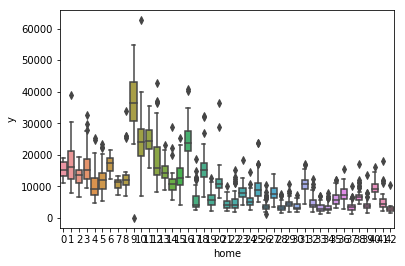

In [144]:
sns.boxplot(x='home', y='y' , data=all_df)
print(team_mapping)

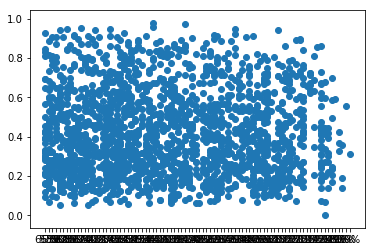

In [145]:
plt.scatter(all_df.humidity,y)

In [ ]:
"""
all_df["win"] = 

if(all_df['home_score'] >= all_df['away_score'])
'home_score', 'away_score',
all_df[""] / all_df["capa"]
"""

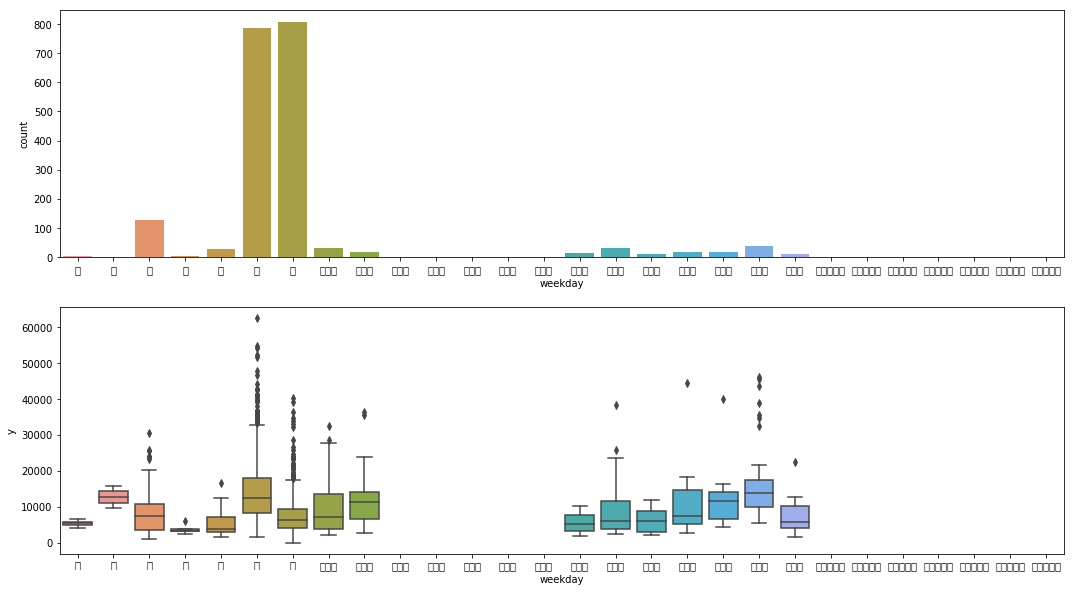

In [146]:
weeks = list('月火水木金土日')
weeks += [w + '・休' for w in weeks]
weeks += [w + '・祝' for w in weeks]

all_df['weekday'] = all_df['gameday'].apply(lambda x: x[:-1].rsplit('(', 1)[-1])
plt.figure(figsize=(18, 10))
plt.subplot(2, 1, 1)
sns.countplot(all_df['weekday'], order=weeks)

plt.subplot(2, 1, 2)
sns.boxplot(x='weekday', y='y' , data=all_df, order=weeks)
plt.show()

In [147]:
all_df["weekday"].unique()

array(['土', '日', '土・祝', '水', '火・祝', '火・休', '金', '月・休', '金・祝', '日・祝',
       '木・祝', '火', '水・祝', '月', '月・祝', '木'], dtype=object)

In [148]:
weekday =all_df["weekday"].unique()
weekday1 = {name:i for(i,name) in enumerate(weekday)}
all_df["weekday"] = all_df["weekday"].map(weekday1)

In [149]:
weekday1

{'土': 0,
 '日': 1,
 '土・祝': 2,
 '水': 3,
 '火・祝': 4,
 '火・休': 5,
 '金': 6,
 '月・休': 7,
 '金・祝': 8,
 '日・祝': 9,
 '木・祝': 10,
 '火': 11,
 '水・祝': 12,
 '月': 13,
 '月・祝': 14,
 '木': 15}

In [150]:
all_df["weekday"]

0        0
1        0
2        0
3        0
4        1
5        0
6        0
7        0
8        0
9        0
10       0
11       2
12       0
13       0
14       3
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       3
23       0
24       0
25       3
26       0
27       0
28       0
29       0
        ..
1923     0
1924     0
1925     1
1926     4
1927     5
1928     0
1929     0
1930     0
1931     1
1932     1
1933    12
1934     8
1935     1
1936     1
1937     1
1938     1
1939     1
1940     1
1941     1
1942     0
1943     0
1944     1
1945     5
1946     0
1947     0
1948     0
1949     0
1950     4
1951     0
1952     1
Name: weekday, Length: 1953, dtype: int64

In [151]:
weeks

['月',
 '火',
 '水',
 '木',
 '金',
 '土',
 '日',
 '月・休',
 '火・休',
 '水・休',
 '木・休',
 '金・休',
 '土・休',
 '日・休',
 '月・祝',
 '火・祝',
 '水・祝',
 '木・祝',
 '金・祝',
 '土・祝',
 '日・祝',
 '月・休・祝',
 '火・休・祝',
 '水・休・祝',
 '木・休・祝',
 '金・休・祝',
 '土・休・祝',
 '日・休・祝']

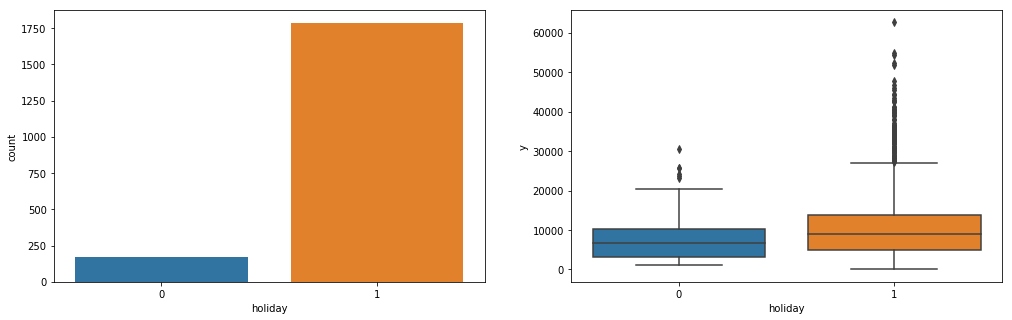

In [152]:
all_df['holiday'] = all_df['weekday'].apply(lambda x: 1 if x == 0 or x== 1 or x == 2 or x == 4 or x == 5 or x == 7 or x == 8 or x == 9 or x == 10 or x == 12 or x == 14 else 0)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.countplot(all_df['holiday'])

plt.subplot(1, 2, 2)
sns.boxplot(x='holiday', y='y', data=all_df)
plt.show()


In [153]:
all_df['okunai'] = all_df['weather'].apply(lambda x: 1 if '屋内' in x else 0)
all_df['ame'] = all_df['weather'].apply(lambda x: 1 if '雨' in x else 0)
all_df['yuki'] = all_df['weather'].apply(lambda x: 1 if '雪' in x else 0)
all_df['hare'] = all_df['weather'].apply(lambda x: 1 if '晴れ' in x else 0)
all_df['kumori'] = all_df['weather'].apply(lambda x: 1 if '曇り' in x else 0)

In [154]:
all_df.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'shuukyaku', 'match_sec',
       'time_hour', 'weekday', 'holiday', 'okunai', 'ame', 'yuki', 'hare',
       'kumori'],
      dtype='object')

In [56]:
all_df["tv"].unique()

array(['スカパー／ｅ２／スカパー光／ＮＨＫ総合', 'スカパー／ｅ２／スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000１）',
       'スカパー／ｅ２／スカパー光／ＮＨＫ仙台／ＮＨＫ静岡', 'スカパー／ｅ２／スカパー光／ＮＨＫ\u3000ＢＳ１',
       'スカパー／ｅ２／スカパー光／ＮＨＫ仙台',
       'スカパー／ｅ２／スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000１）／ミヤギテレビ', 'スカパー／ｅ２／スカパー光',
       'スカパー／ｅ２／スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000４）',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ\u3000ＢＳ１', 'スカパー！／スカパー！プレミアムサービス',
       'スカパー！／スカパー！プレミアムサービス／ＢＳ－ＴＢＳ／ＮＨＫ\u3000ＢＳ１（録）',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ仙台／ＮＨＫ甲府', 'スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合',
       'スカパー！／スカパー！プレミアムサービス／仙台放送', 'スカパー！／スカパー！プレミアムサービス／ＮＨＫ仙台',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ仙台／ＮＨＫ新潟',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ仙台／ＮＨＫ広島', 'スカパー！／スカパー！プレミアムサービス／東北放送',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ仙台／ＮＨＫ佐賀',
       'スカパー／ｅ２／スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000４）／ＮＨＫ名古屋',
       'スカパー／ｅ２／スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000４）／ＮＨＫ名古屋／ＮＨＫ佐賀',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ名古屋', 'スカパー！／スカパー！プレミアムサービス／ＮＨＫ名古屋／ＮＨＫ静岡',
       'スカパー！／スカパー！プレミアムサービス／名古屋テレビ（録）', 'スカパー！／スカパー！プレミアムサービス／東海テレビ（録）',
       'スカパー！／スカパー！プレミアムサービス／ＮＨＫ\u3000Ｂ

In [155]:
tv1 = set()

for i in all_df["tv"].str.split("／"):
    tv1.update(i)

In [156]:
tv1

{'あいテレビ',
 'とちぎテレビ',
 'とちぎテレビ（録）',
 'スカパー',
 'スカパー光',
 'スカパー光（スカイ・Ａ\u3000ｓｐｏｒｔｓ＋）',
 'スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000１）',
 'スカパー光（Ｊ\u3000ＳＰＯＲＴＳ\u3000４）',
 'スカパー光（ＴＢＳチャンネル）',
 'スカパー！',
 'スカパー！プレミアムサービス',
 'スカパー！プレミアムサービス※１',
 'テレビ信州',
 'テレビ大分',
 'テレビ大阪',
 'テレビ山梨',
 'テレビ愛媛（録）',
 'テレビ新潟',
 'テレビ神奈川',
 'テレビ西日本（録）',
 'テレビ静岡',
 'テレ玉',
 'テレ玉（録）',
 'ミヤギテレビ',
 '中京テレビ（録）',
 '中国放送',
 '仙台放送',
 '信越放送',
 '北海道テレビ',
 '名古屋テレビ（録）',
 '富山テレビ',
 '山形テレビ',
 '山梨放送',
 '山陽放送',
 '岐阜放送',
 '岐阜放送（録）',
 '岡山放送',
 '岡山放送（録）',
 '新潟テレビ２１',
 '新潟放送',
 '新潟総合テレビ',
 '日本海テレビ',
 '札幌テレビ',
 '東北放送',
 '東海テレビ（録）',
 '毎日放送（録）',
 '熊本放送',
 '熊本県民テレビ',
 '福岡放送（録）',
 '群馬テレビ',
 '群馬テレビ（録）',
 '西日本放送',
 '長崎国際テレビ',
 '長野放送',
 '長野朝日放送',
 '静岡放送',
 'ＢＳ－ＴＢＳ',
 'ＢＳ－ＴＢＳ（録）',
 'ＫＢＳ京都',
 'ＫＢＳ京都（録）',
 'ＮＨＫ\u3000ＢＳ１',
 'ＮＨＫ\u3000ＢＳ１（録）',
 'ＮＨＫ京都',
 'ＮＨＫ仙台',
 'ＮＨＫ佐賀',
 'ＮＨＫ前橋',
 'ＮＨＫ北九州',
 'ＮＨＫ名古屋',
 'ＮＨＫ大分',
 'ＮＨＫ大阪',
 'ＮＨＫ宇都宮',
 'ＮＨＫ富山',
 'ＮＨＫ山形',
 'ＮＨＫ岐阜',
 'ＮＨＫ岡山',
 'ＮＨＫ広島',
 'ＮＨＫ徳島',
 'ＮＨＫ徳島（録）',
 'ＮＨＫ新潟',
 'ＮＨＫ札幌',
 'ＮＨＫ松山',
 'ＮＨＫ水戸',
 'ＮＨＫ水戸（録）',
 'ＮＨＫ熊本',


In [157]:
import re
clean_cas = set()

# ()と※より後ろを消す
# 小文字を大文字に統一
# ーを-に変換する
# スカパー軍は全てスカパーに統一

def cleanify(cas):
    cas = cas.upper()
    cas = re.sub("\（.+\）|\*", "", cas)
    cas = cas.split("※")[0]\
               .rstrip(" ")\
               .replace("ー", "-")\
               .replace(" ", "_")
    if cas[:4] == "スカパ-":
        cas = "スカパー"
    return cas

for cas in tv1:
    clean_cas.add(cleanify(cas))

In [66]:
clean_cas

{'あいテレビ',
 'とちぎテレビ',
 'スカパー',
 'テレビ信州',
 'テレビ大分',
 'テレビ大阪',
 'テレビ山梨',
 'テレビ愛媛',
 'テレビ新潟',
 'テレビ神奈川',
 'テレビ西日本',
 'テレビ静岡',
 'テレ玉',
 'ミヤギテレビ',
 '中京テレビ',
 '中国放送',
 '仙台放送',
 '信越放送',
 '北海道テレビ',
 '名古屋テレビ',
 '富山テレビ',
 '山形テレビ',
 '山梨放送',
 '山陽放送',
 '岐阜放送',
 '岡山放送',
 '新潟テレビ２１',
 '新潟放送',
 '新潟総合テレビ',
 '日本海テレビ',
 '札幌テレビ',
 '東北放送',
 '東海テレビ',
 '毎日放送',
 '熊本放送',
 '熊本県民テレビ',
 '福岡放送',
 '群馬テレビ',
 '西日本放送',
 '長崎国際テレビ',
 '長野放送',
 '長野朝日放送',
 '静岡放送',
 'ＢＳ－ＴＢＳ',
 'Ｅ２',
 'ＫＢＳ京都',
 'ＮＨＫ\u3000ＢＳ１',
 'ＮＨＫ京都',
 'ＮＨＫ仙台',
 'ＮＨＫ佐賀',
 'ＮＨＫ前橋',
 'ＮＨＫ北九州',
 'ＮＨＫ名古屋',
 'ＮＨＫ大分',
 'ＮＨＫ大阪',
 'ＮＨＫ宇都宮',
 'ＮＨＫ富山',
 'ＮＨＫ山形',
 'ＮＨＫ岐阜',
 'ＮＨＫ岡山',
 'ＮＨＫ広島',
 'ＮＨＫ徳島',
 'ＮＨＫ新潟',
 'ＮＨＫ札幌',
 'ＮＨＫ松山',
 'ＮＨＫ水戸',
 'ＮＨＫ熊本',
 'ＮＨＫ甲府',
 'ＮＨＫ神戸',
 'ＮＨＫ福岡',
 'ＮＨＫ総合',
 'ＮＨＫ長崎',
 'ＮＨＫ長野',
 'ＮＨＫ静岡',
 'ＮＨＫ高松',
 'ＮＨＫ鳥取',
 'ＴＯＫＹＯ\u3000ＭＸ'}

In [158]:
dir(tmp)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

In [159]:
tmp = all_df["tv"].str.split("／")\
                              .apply(lambda casters: [cleanify(cas) for cas in casters])
all_df["tv"] = tmp

In [160]:
for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))

tmp

0              [スカパー, Ｅ２, ＮＨＫ総合]
1                     [スカパー, Ｅ２]
2       [ＮＨＫ静岡, スカパー, Ｅ２, ＮＨＫ仙台]
3            [ＮＨＫ　ＢＳ１, スカパー, Ｅ２]
4              [スカパー, Ｅ２, ＮＨＫ仙台]
5             [スカパー, Ｅ２, ミヤギテレビ]
6                     [スカパー, Ｅ２]
7                     [スカパー, Ｅ２]
8                     [スカパー, Ｅ２]
9                     [スカパー, Ｅ２]
10                    [スカパー, Ｅ２]
11           [ＮＨＫ　ＢＳ１, スカパー, Ｅ２]
12               [ＮＨＫ　ＢＳ１, スカパー]
13                        [スカパー]
14                        [スカパー]
15       [ＮＨＫ　ＢＳ１, スカパー, ＢＳ－ＴＢＳ]
16          [スカパー, ＮＨＫ仙台, ＮＨＫ甲府]
17                 [スカパー, ＮＨＫ総合]
18                        [スカパー]
19                  [スカパー, 仙台放送]
20                        [スカパー]
21                        [スカパー]
22                        [スカパー]
23               [ＮＨＫ　ＢＳ１, スカパー]
24                        [スカパー]
25                        [スカパー]
26                        [スカパー]
27                        [スカパー]
28                        [スカパー]
29                 [スカパー, ＮＨＫ仙台]
          

In [161]:
all_df["seisiki_tv"] = tmp

In [162]:

for i in range(len(tmp)):
    tmp[i] = list(set(tmp[i]))


In [163]:
tmp2 = np.zeros(len(tmp))
for i in range(len(tmp)):
    tmp2[i] = len(tmp[i])



In [164]:
tmp2

array([3., 2., 4., ..., 2., 1., 1.])

In [165]:
all_df["tv_count"] = tmp2

In [166]:
all_df.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,time_hour,weekday,holiday,okunai,ame,yuki,hare,kumori,seisiki_tv,tv_count
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,14,0,1,0,1,0,0,0,"[スカパー, Ｅ２, ＮＨＫ総合]",3.0
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,13,0,1,0,1,0,0,0,"[スカパー, Ｅ２]",2.0
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,14,0,1,0,0,0,0,0,"[ＮＨＫ静岡, スカパー, Ｅ２, ＮＨＫ仙台]",4.0
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,19,0,1,0,0,0,0,0,"[ＮＨＫ ＢＳ１, スカパー, Ｅ２]",3.0
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,13,1,1,0,1,0,0,0,"[スカパー, Ｅ２, ＮＨＫ仙台]",3.0


In [238]:
year_2012 =all_df[all_df.year==2012]
year_2013 =all_df[all_df.year==2013]
year_2014 =all_df[all_df.year==2014]

In [239]:
year_2014

,id,y,year,stage,match,gameday,time,home,away,stadium,...,time_hour,weekday,holiday,okunai,ame,yuki,hare,kumori,seisiki_tv,tv_count
30,15668,15852,2014,Ｊ１,第１節第１日,03/01(土),14:05,0,11,0,...,14,0,1,0,0,0,0,0,"[ＮＨＫ新潟, スカパー, ＮＨＫ仙台]",3.0
31,15693,13380,2014,Ｊ１,第３節第１日,03/15(土),17:04,0,2,0,...,17,0,1,0,0,0,0,0,[スカパー],1.0
32,15706,11144,2014,Ｊ１,第５節第２日,03/29(土),14:04,0,20,0,...,14,0,1,0,0,0,0,0,[スカパー],1.0
33,15732,11413,2014,Ｊ１,第８節第１日,04/19(土),14:04,0,5,0,...,14,0,1,0,0,0,0,0,[スカパー],1.0
34,15755,13040,2014,Ｊ１,第１０節第１日,04/29(火・祝),16:04,0,6,0,...,16,4,1,0,0,0,0,0,[スカパー],1.0
35,15768,12945,2014,Ｊ１,第１２節第１日,05/06(火・休),13:04,0,15,0,...,13,5,1,0,0,0,0,0,[スカパー],1.0
36,15793,18863,2014,Ｊ１,第１４節第２日,05/18(日),13:04,0,3,0,...,13,1,1,0,0,0,0,0,"[スカパー, ＮＨＫ広島, ＮＨＫ仙台]",3.0
37,15804,13302,2014,Ｊ１,第１６節第１日,07/23(水),19:03,0,1,0,...,19,3,0,0,0,0,0,0,"[スカパー, 東北放送]",2.0
57,15715,15214,2014,Ｊ１,第６節第１日,04/06(日),13:04,1,3,1,...,13,1,1,1,0,0,0,0,"[スカパー, ＮＨＫ名古屋]",2.0
58,15728,19505,2014,Ｊ１,第７節第２日,04/12(土),15:04,1,9,1,...,15,0,1,0,0,0,0,0,[スカパー],1.0


In [240]:
all_df["stage"].unique()

array(['Ｊ１', 'Ｊ２'], dtype=object)

In [241]:
stage_J1 =all_df[all_df.stage == 'Ｊ１']
stage_J2 =all_df[all_df.stage == 'Ｊ２']

In [242]:
stage_J1

,id,y,year,stage,match,gameday,time,home,away,stadium,...,time_hour,weekday,holiday,okunai,ame,yuki,hare,kumori,seisiki_tv,tv_count
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,14,0,1,0,1,0,0,0,"[スカパー, Ｅ２, ＮＨＫ総合]",3.0
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,13,0,1,0,1,0,0,0,"[スカパー, Ｅ２]",2.0
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,14,0,1,0,0,0,0,0,"[ＮＨＫ静岡, スカパー, Ｅ２, ＮＨＫ仙台]",4.0
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,19,0,1,0,0,0,0,0,"[ＮＨＫ ＢＳ１, スカパー, Ｅ２]",3.0
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,13,1,1,0,1,0,0,0,"[スカパー, Ｅ２, ＮＨＫ仙台]",3.0
5,14111,13554,2012,Ｊ１,第１４節第１日,06/16(土),13:33,0,4,0,...,13,0,1,0,1,0,0,0,"[スカパー, Ｅ２, ミヤギテレビ]",3.0
6,14130,18722,2012,Ｊ１,第１６節第１日,06/30(土),18:34,0,3,0,...,18,0,1,0,0,0,0,0,"[スカパー, Ｅ２]",2.0
7,14158,14611,2012,Ｊ１,第１９節第１日,07/28(土),18:34,0,5,0,...,18,0,1,0,0,0,0,0,"[スカパー, Ｅ２]",2.0
8,14166,17935,2012,Ｊ１,第２０節第１日,08/04(土),18:34,0,10,0,...,18,0,1,0,0,0,0,0,"[スカパー, Ｅ２]",2.0
9,14185,17715,2012,Ｊ１,第２２節第１日,08/18(土),19:04,0,8,0,...,19,0,1,0,0,0,0,0,"[スカパー, Ｅ２]",2.0


In [243]:
year_2012.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'shuukyaku', 'match_sec',
       'time_hour', 'weekday', 'holiday', 'okunai', 'ame', 'yuki', 'hare',
       'kumori', 'seisiki_tv', 'tv_count'],
      dtype='object')

In [284]:
senshu_2012 = year_2012.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

senshu_2013 = year_2013.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

senshu_2014 = year_2014.loc[:,["id",'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11']]

In [285]:
senshu_2014

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11
30,15668,関 憲太郎,菅井 直樹,鎌田 次郎,石川 直樹,二見 宏志,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,松原 健,舞行龍ジェームズ,大井 健太郎,金 珍洙,レオ シルバ,成岡 翔,田中 亜土夢,岡本 英也,田中 達也,川又 堅碁
31,15693,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,鎌田 次郎,富田 晋伍,武藤 雄樹,...,加地 亮,岩下 敬輔,丹羽 大輝,藤春 廣輝,内田 達也,今野 泰幸,大森 晃太郎,遠藤 保仁,佐藤 晃大,倉田 秋
32,15706,関 憲太郎,石川 大徳,渡辺 広大,鎌田 次郎,石川 直樹,マグリンチィ,角田 誠,富田 晋伍,梁 勇基,...,青山 直晃,山本 英臣,佐々木 翔,福田 健介,新井 涼平,マルキーニョス パラナ,阿部 翔平,河本 明人,石原 克哉,クリスティアーノ
33,15732,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,富田 晋伍,鎌田 次郎,梁 勇基,...,丹羽 竜平,キム ミンヒョク,坂井 達弥,安田 理大,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,豊田 陽平
34,15755,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,田中 裕介,ジェシ,中澤 聡太,谷口 彰悟,大島 僚太,中村 憲剛,森谷 賢太郎,レナト,小林 悠,大久保 嘉人
35,15768,関 憲太郎,武井 択也,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,茂木 弘人,増川 隆洋,岩波 拓也,奥井 諒,チョン ウヨン,橋本 英郎,森岡 亮太,ペドロ ジュニオール,小川 慶治朗,マルキーニョス
36,15793,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,塩谷 司,千葉 和彦,水本 裕貴,ミキッチ,柴﨑 晃誠,森﨑 和幸,清水 航平,森﨑 浩司,髙萩 洋次郎,佐藤 寿人
37,15804,関 憲太郎,菅井 直樹,鎌田 次郎,角田 誠,石川 直樹,太田 吉彰,武井 択也,富田 晋伍,梁 勇基,...,牟田 雄祐,大武 峻,本多 勇喜,矢野 貴章,ダニルソン,田口 泰士,佐藤 和樹,レアンドロ ドミンゲス,松田 力,永井 謙佑
57,15715,楢﨑 正剛,刀根 亮輔,大武 峻,田中 マルクス闘莉王,本多 勇喜,矢田 旭,磯村 亮太,田口 泰士,小川 佳純,...,塩谷 司,千葉 和彦,水本 裕貴,ミキッチ,青山 敏弘,森﨑 和幸,柏 好文,石原 直樹,髙萩 洋次郎,佐藤 寿人
58,15728,楢﨑 正剛,刀根 亮輔,大武 峻,田中 マルクス闘莉王,本多 勇喜,枝村 匠馬,磯村 亮太,ダニルソン,小川 佳純,...,森脇 良太,那須 大亮,槙野 智章,梅崎 司,柏木 陽介,阿部 勇樹,宇賀神 友弥,原口 元気,興梠 慎三,李 忠成


In [286]:
#2012優秀選手リスト
yushu2012 = ["林　卓人","楢崎　正剛","西川　周作","上本　大海","駒野　友一","角田　誠","田中　マルクス闘莉王","鎌田　次郎","千葉　和彦","槙野　智章","水本　裕貴","栗原　勇蔵","森脇　良太","中澤　佑二","菅井　直樹","山田　大記","梁　勇基","遠藤　保仁","阿部　勇樹","柿谷　曜一朗","レアンドロ","青山　敏弘","中村　憲剛","高萩　洋次郎","中村　俊輔","森崎　和幸","赤嶺　真吾","前田　遼一","ウイルソン","佐藤　寿人","大前　元紀","豊田　陽平"]
yushu2013 =["榎本　哲也","キム　ジンヒョン","西川 周作","那須　大亮","槙野　智章","森重　真人","太田　宏介","栗原　勇蔵","ドゥトラ","小林　祐三","中澤　佑二","富澤　清太郎","山下　達也","水本　裕貴","塩谷　司","阿部　勇樹","中村　憲剛","中町　公祐","中村　俊輔","レオ　シルバ","山口　螢","柿谷　曜一朗","青山　敏弘","高萩　洋次郎","ミキッチ","大迫　勇也","レナト","大久保　嘉人","齋藤　学","マルキーニョス","川又　堅碁","佐藤　寿人"]
yushu2014 =["西川　周作","東口　順昭","林　彰洋","西　大伍","昌子　源","那須　大亮","槙野　智章","太田　宏介","森重　真人","今野　泰幸","米倉　恒貴","塩谷　司","水本　裕貴","安田　理大","遠藤　康","柴崎　岳","阿部　勇樹","柏木　陽介","武藤　嘉紀","大島　僚太","中村　憲剛","レオ　シルバ","阿部　浩之","遠藤　保仁","森岡　亮太","興梠　慎三","大久保　嘉人","小林　悠","レナト","宇佐美　貴史","パトリック","豊田　陽平"]


In [287]:

for i in range(len(yushu2012)):
    senshu_2012 = senshu_2012.replace(yushu2012[i],"代表2012")

#senshu_2012

for i in range(len(yushu2013)):
    senshu_2013 = senshu_2013.replace(yushu2013[i],"代表2013")
    

for i in range(len(yushu2014)):
    senshu_2014 = senshu_2014.replace(yushu2014[i],"代表2014")

In [288]:
player_2012 = senshu_2012.values
player_2013 = senshu_2013.values
player_2014 = senshu_2014.values

In [289]:
tmp4 = np.zeros(len(senshu_2012.loc[:,['home_01']]))
tmp5 = np.zeros(len(senshu_2013.loc[:,['home_01']]))
tmp6 = np.zeros(len(senshu_2014.loc[:,['home_01']]))



In [290]:
senshu_2013.shape

(768, 23)

In [291]:
player_2013[1,].shape

(23,)

In [292]:
for i in range(len(tmp4)):
    ss = player_2012[i,]
    tmp4[i] = len(np.where(ss == '代表2012')[0])

In [293]:
tmp4


array([ 7.,  5., 10.,  7.,  8.,  6., 13.,  7.,  9.,  8.,  8.,  8.,  9.,
        9.,  8.,  7.,  9.,  2.,  2.,  1.,  1.,  7.,  4.,  1.,  2.,  2.,
        1.,  2.,  2.,  2.,  8.,  2.,  2.,  1.,  4.,  2.,  3.,  2.,  2.,
        8.,  2.,  4.,  2.,  8.,  6.,  7.,  7.,  6.,  9.,  6.,  6.,  9.,
        7.,  7.,  6., 14.,  7.,  6.,  6.,  6.,  3.,  2.,  0.,  0.,  0.,
        1.,  1.,  3.,  5.,  1.,  1.,  4.,  1.,  7.,  7.,  2.,  1.,  1.,
        1.,  2.,  1.,  2.,  0.,  2.,  1.,  1.,  1.,  7.,  4.,  1.,  8.,
        4.,  1.,  1.,  2.,  2.,  3.,  3.,  2.,  1.,  1.,  0.,  1.,  0.,
        2.,  0.,  1.,  1.,  0.,  1.,  0.,  6.,  7.,  0.,  0.,  3.,  3.,
        3.,  1.,  6.,  1.,  6.,  0.,  0.,  1.,  0.,  3.,  1.,  0.,  2.,
        0.,  0.,  2.,  2.,  5.,  2.,  3.,  3.,  4.,  2.,  2.,  2.,  4.,
        2.,  3.,  8.,  3.,  3.,  7., 10.,  3.,  3.,  4.,  3.,  3.,  2.,
        4.,  5.,  7.,  4.,  2.,  4.,  3.,  0.,  1.,  3.,  5.,  0.,  3.,
        1.,  0.,  2.,  0.,  6.,  1.,  1.,  0.,  1.,  1.,  0.,  1

In [294]:
len(np.where(player_2012[1,] == '代表2012')[0])

5

In [295]:
senshu_2012["yushu"] = tmp4

In [296]:
senshu_2012

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,yushu
0,13994,代表2012,代表2012,代表2012,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,7.0
1,14012,代表2012,代表2012,渡辺 広大,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,菊地 光将,金 英權,下平 匠,青木 拓矢,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,5.0
2,14031,代表2012,代表2012,代表2012,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,チョ ビョングク,藤田 義明,宮崎 智彦,山本 康裕,小林 裕紀,代表2012,松浦 拓弥,菅沼 実,代表2012,10.0
3,14055,代表2012,代表2012,代表2012,代表2012,朴 柱成,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,森重 真人,チャン ヒョンス,太田 宏介,高橋 秀人,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,7.0
4,14075,代表2012,代表2012,代表2012,代表2012,朴 柱成,富田 晋伍,代表2012,代表2012,関口 訓充,...,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,アレックス,河井 陽介,ジミー フランサ,代表2012,高木 俊幸,8.0
5,14111,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,富田 晋伍,代表2012,太田 吉彰,代表2012,...,ジェイド ノース,岡山 一成,高木 純平,山本 真希,河合 竜二,砂川 誠,近藤 祐介,岡本 賢明,大島 秀夫,6.0
6,14130,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,富田 晋伍,代表2012,太田 吉彰,代表2012,...,代表2012,代表2012,ミキッチ,代表2012,森﨑 和幸,清水 航平,石原 直樹,髙萩 洋次郎,代表2012,13.0
7,14158,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,松下 年宏,田村 直也,太田 吉彰,代表2012,...,キム クナン,呂 成海,磯崎 敬太,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,代表2012,7.0
8,14166,代表2012,代表2012,代表2012,渡辺 広大,内山 俊彦,松下 年宏,田村 直也,太田 吉彰,代表2012,...,代表2012,代表2012,ドゥトラ,富澤 清太郎,兵藤 慎剛,代表2012,小野 裕二,マルキーニョス,大黒 将志,9.0
9,14185,代表2012,代表2012,代表2012,代表2012,朴 柱成,松下 年宏,代表2012,太田 吉彰,代表2012,...,増嶋 竜也,近藤 直也,橋本 和,水野 晃樹,茨田 陽生,大谷 秀和,ジョルジ ワグネル,工藤 壮人,ネット バイアーノ,8.0


In [297]:
for i in range(len(tmp5)):
    ss = player_2013[i,]
    tmp5[i] = len(np.where(ss == '代表2013')[0])

In [298]:
senshu_2013["yushu"] = tmp5
senshu_2013

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,yushu
16,14836,林 卓人,田村 直也,渡辺 広大,石川 直樹,和田 拓也,富田 晋伍,松下 年宏,太田 吉彰,梁 勇基,...,青山 直晃,土屋 征夫,松橋 優,柏 好文,井澤 惇,佐々木 翔,羽生 直剛,金子 昌広,ウーゴ,0.0
17,14854,林 卓人,菅井 直樹,渡辺 広大,石川 直樹,蜂須賀 孝治,松下 年宏,鎌田 次郎,太田 吉彰,梁 勇基,...,増嶋 竜也,近藤 直也,山中 亮輔,レアンドロ ドミンゲス,谷口 博之,大谷 秀和,狩野 健太,工藤 壮人,クレオ,0.0
18,14872,林 卓人,菅井 直樹,渡辺 広大,石川 直樹,田村 直也,富田 晋伍,鎌田 次郎,梁 勇基,佐々木 勇人,...,大井 健太郎,金 根煥,金 珍洙,三門 雄大,代表2013,成岡 翔,田中 亜土夢,田中 達也,ブルーノ ロペス,1.0
19,14927,林 卓人,田村 直也,渡辺 広大,鎌田 次郎,蜂須賀 孝治,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,菊地 光将,高橋 祥平,下平 匠,渡邉 大剛,青木 拓矢,金澤 慎,曺 永哲,ズラタン,ノヴァコヴィッチ,0.0
20,14955,林 卓人,菅井 直樹,角田 誠,石川 直樹,蜂須賀 孝治,富田 晋伍,梁 勇基,太田 吉彰,武藤 雄樹,...,大野 和成,島村 毅,古林 将太,ハン グギョン,永木 亮太,高山 薫,菊池 大介,大槻 周平,武富 孝介,0.0
21,14973,林 卓人,菅井 直樹,鎌田 次郎,石川 直樹,蜂須賀 孝治,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,チョ ビョングク,藤田 義明,宮崎 智彦,小林 裕紀,田中 裕人,山田 大記,ペク ソンドン,松浦 拓弥,前田 遼一,0.0
22,14980,林 卓人,菅井 直樹,鎌田 次郎,石川 直樹,蜂須賀 孝治,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,千葉 和彦,代表2013,代表2013,代表2013,森﨑 和幸,山岸 智,石原 直樹,髙萩 洋次郎,代表2013,5.0
23,15000,林 卓人,菅井 直樹,鎌田 次郎,角田 誠,石川 直樹,富田 晋伍,松下 年宏,太田 吉彰,梁 勇基,...,實藤 友紀,中澤 聡太,登里 享平,山本 真希,稲本 潤一,代表2013,アラン ピニェイロ,代表2013,代表2013,3.0
24,15009,林 卓人,蜂須賀 孝治,鎌田 次郎,角田 誠,石川 直樹,松下 年宏,梁 勇基,太田 吉彰,富田 晋伍,...,青木 剛,山村 和也,中田 浩二,柴崎 岳,小笠原 満男,遠藤 康,中村 充孝,野沢 拓也,代表2013,1.0
25,15034,林 卓人,石川 大徳,鎌田 次郎,角田 誠,石川 直樹,松下 年宏,梁 勇基,太田 吉彰,富田 晋伍,...,丸橋 祐介,酒本 憲幸,代表2013,扇原 貴宏,代表2013,楠神 順平,シンプリシオ,代表2013,エジノ,4.0


In [299]:
tmp5

array([ 0.,  0.,  1.,  0.,  0.,  0.,  5.,  3.,  1.,  4.,  0.,  8.,  0.,
        0.,  2.,  0.,  0.,  1.,  0.,  7.,  0.,  1.,  0.,  0.,  0.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  5., 14.,  5.,  5.,
        5.,  5.,  8.,  5.,  5.,  5.,  7.,  5.,  5.,  9.,  6.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
        9.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  3.,  1.,  3.,
        3.,  2.,  2.,  5.,  5.,  4.,  6.,  3.,  2.,  7.,  3.,  3.,  2.,
        2., 13.,  5.,  0.,  1.,  3.,  4.,  0.,  0.,  0.,  3.,  0.,  9.,
        0.,  2.,  0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  9.,  3.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  5.,  2.,  2.,  3.,  3.,  3.,  3.,
        3.,  5., 13.,  8.,  3.,  5.,  3.,  3.,  3.,  6.,  7.,  4.,  9.,
        9.,  9., 12.,  9., 10., 10., 10.,  9., 12., 13., 14.,  9., 12.,
        3.,  3.,  2.,  2.,  2.,  4.,  6.,  2.,  4.,  2.,  2.,  2

In [300]:
yushu2013 =["榎本　哲也","キム　ジンヒョン","西川 周作","那須　大亮","槙野　智章","森重　真人","太田　宏介","栗原　勇蔵","ドゥトラ","小林　祐三","中澤　佑二","富澤　清太郎","山下　達也","水本　裕貴","塩谷　司","阿部　勇樹","中村　憲剛","中町　公祐","中村　俊輔","レオ　シルバ","山口　螢","柿谷　曜一朗","青山　敏弘","高萩　洋次郎","ミキッチ","大迫　勇也","レナト","大久保　嘉人","齋藤　学","マルキーニョス","川又　堅碁","佐藤　寿人"]
for i in range(len(yushu2013)):
    senshu_2013 = senshu_2013.replace(yushu2013[i],"代表2013")
player_2013 = senshu_2013.values
tmp5 = np.zeros(len(senshu_2013.loc[:,['home_01']]))
for i in range(len(tmp5)):
    ss = player_2013[i,]
    tmp5[i] = len(np.where(ss == '代表2013')[0])


In [301]:
senshu_2013["yushu"] = tmp5

In [305]:
tmp5

array([ 0.,  0.,  1.,  0.,  0.,  0.,  5.,  3.,  1.,  4.,  0.,  8.,  0.,
        0.,  2.,  0.,  0.,  1.,  0.,  7.,  0.,  1.,  0.,  0.,  0.,  3.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  5., 14.,  5.,  5.,
        5.,  5.,  8.,  5.,  5.,  5.,  7.,  5.,  5.,  9.,  6.,  5.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,
        9.,  0.,  0.,  0.,  0.,  0.,  0.,  5.,  4.,  0.,  3.,  1.,  3.,
        3.,  2.,  2.,  5.,  5.,  4.,  6.,  3.,  2.,  7.,  3.,  3.,  2.,
        2., 13.,  5.,  0.,  1.,  3.,  4.,  0.,  0.,  0.,  3.,  0.,  9.,
        0.,  2.,  0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  9.,  3.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  5.,  2.,  2.,  3.,  3.,  3.,  3.,
        3.,  5., 13.,  8.,  3.,  5.,  3.,  3.,  3.,  6.,  7.,  4.,  9.,
        9.,  9., 12.,  9., 10., 10., 10.,  9., 12., 13., 14.,  9., 12.,
        3.,  3.,  2.,  2.,  2.,  4.,  6.,  2.,  4.,  2.,  2.,  2

In [306]:
yushu2014 =["西川　周作","東口　順昭","林　彰洋","西　大伍","昌子　源","那須　大亮","槙野　智章","太田　宏介","森重　真人","今野　泰幸","米倉　恒貴","塩谷　司","水本　裕貴","安田　理大","遠藤　康","柴崎　岳","阿部　勇樹","柏木　陽介","武藤　嘉紀","大島　僚太","中村　憲剛","レオ　シルバ","阿部　浩之","遠藤　保仁","森岡　亮太","興梠　慎三","大久保　嘉人","小林　悠","レナト","宇佐美　貴史","パトリック","豊田　陽平"]


In [307]:
for i in range(len(yushu2014)):
    senshu_2014 = senshu_2014.replace(yushu2014[i],"代表2014")



In [308]:
player_2014 = senshu_2014.values
tmp6 = np.zeros(len(senshu_2014.loc[:,['home_01']]))


In [309]:
for i in range(len(tmp6)):
    ss = player_2014[i,]
    tmp6[i] = len(np.where(ss == '代表2014')[0])


In [310]:
tmp6

array([ 1.,  3.,  0.,  3.,  5.,  1.,  2.,  0.,  2.,  6.,  0.,  5.,  0.,
        0.,  9.,  6.,  7.,  3.,  4.,  4.,  7.,  6.,  6.,  8.,  2.,  5.,
        2.,  2.,  2.,  5.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  6.,  7.,  3.,  5.,  3.,  7.,  3.,  3.,  6.,  5.,  5.,
        2.,  9.,  4.,  8.,  5.,  5.,  0.,  0.,  1.,  0.,  6.,  2.,  1.,
        0.,  3.,  0.,  0.,  0.,  5.,  3.,  1.,  0.,  0.,  8.,  6.,  5.,
       11.,  5.,  8.,  6.,  7.,  9.,  0.,  0.,  2.,  3.,  3.,  3.,  5.,
        1.,  3.,  1.,  1.,  4.,  4.,  2.,  2.,  0.,  4.,  0.,  0.,  0.,
        3.,  0.,  2.,  1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  6.,  1.,  1.,  2.,
        8.,  1.,  4.,  3.,  7.,  4.,  2.,  3.,  8.,  7.,  3.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,  1.,  4.,  0.,  3.,
        3.,  3.,  4.,  4.,  3.,  4.,  4.,  3.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [311]:
senshu_2014["yushu"] = tmp6

In [312]:
senshu_2014

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,yushu
30,15668,関 憲太郎,菅井 直樹,鎌田 次郎,石川 直樹,二見 宏志,富田 晋伍,角田 誠,太田 吉彰,梁 勇基,...,舞行龍ジェームズ,大井 健太郎,金 珍洙,代表2014,成岡 翔,田中 亜土夢,岡本 英也,田中 達也,川又 堅碁,1.0
31,15693,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,鎌田 次郎,富田 晋伍,武藤 雄樹,...,岩下 敬輔,丹羽 大輝,藤春 廣輝,内田 達也,代表2014,大森 晃太郎,代表2014,佐藤 晃大,倉田 秋,3.0
32,15706,関 憲太郎,石川 大徳,渡辺 広大,鎌田 次郎,石川 直樹,マグリンチィ,角田 誠,富田 晋伍,梁 勇基,...,山本 英臣,佐々木 翔,福田 健介,新井 涼平,マルキーニョス パラナ,阿部 翔平,河本 明人,石原 克哉,クリスティアーノ,0.0
33,15732,関 憲太郎,菅井 直樹,渡辺 広大,石川 直樹,二見 宏志,太田 吉彰,富田 晋伍,鎌田 次郎,梁 勇基,...,キム ミンヒョク,坂井 達弥,代表2014,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,代表2014,3.0
34,15755,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,ジェシ,中澤 聡太,谷口 彰悟,代表2014,代表2014,森谷 賢太郎,代表2014,代表2014,代表2014,5.0
35,15768,関 憲太郎,武井 択也,渡辺 広大,鎌田 次郎,石川 直樹,太田 吉彰,富田 晋伍,角田 誠,梁 勇基,...,増川 隆洋,岩波 拓也,奥井 諒,チョン ウヨン,橋本 英郎,代表2014,ペドロ ジュニオール,小川 慶治朗,マルキーニョス,1.0
36,15793,関 憲太郎,菅井 直樹,渡辺 広大,角田 誠,石川 直樹,太田 吉彰,富田 晋伍,武井 択也,梁 勇基,...,千葉 和彦,代表2014,ミキッチ,柴﨑 晃誠,森﨑 和幸,清水 航平,森﨑 浩司,髙萩 洋次郎,佐藤 寿人,2.0
37,15804,関 憲太郎,菅井 直樹,鎌田 次郎,角田 誠,石川 直樹,太田 吉彰,武井 択也,富田 晋伍,梁 勇基,...,大武 峻,本多 勇喜,矢野 貴章,ダニルソン,田口 泰士,佐藤 和樹,レアンドロ ドミンゲス,松田 力,永井 謙佑,0.0
57,15715,楢﨑 正剛,刀根 亮輔,大武 峻,田中 マルクス闘莉王,本多 勇喜,矢田 旭,磯村 亮太,田口 泰士,小川 佳純,...,千葉 和彦,代表2014,ミキッチ,青山 敏弘,森﨑 和幸,柏 好文,石原 直樹,髙萩 洋次郎,佐藤 寿人,2.0
58,15728,楢﨑 正剛,刀根 亮輔,大武 峻,田中 マルクス闘莉王,本多 勇喜,枝村 匠馬,磯村 亮太,ダニルソン,小川 佳純,...,代表2014,代表2014,梅崎 司,代表2014,代表2014,宇賀神 友弥,原口 元気,代表2014,李 忠成,6.0


In [313]:
a = pd.concat([senshu_2012,senshu_2013])
b = pd.concat([a,senshu_2014])

In [314]:
b

,id,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,...,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,yushu
0,13994,代表2012,代表2012,代表2012,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,7.0
1,14012,代表2012,代表2012,渡辺 広大,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,菊地 光将,金 英權,下平 匠,青木 拓矢,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,5.0
2,14031,代表2012,代表2012,代表2012,代表2012,田村 直也,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,チョ ビョングク,藤田 義明,宮崎 智彦,山本 康裕,小林 裕紀,代表2012,松浦 拓弥,菅沼 実,代表2012,10.0
3,14055,代表2012,代表2012,代表2012,代表2012,朴 柱成,富田 晋伍,代表2012,太田 吉彰,関口 訓充,...,森重 真人,チャン ヒョンス,太田 宏介,高橋 秀人,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,7.0
4,14075,代表2012,代表2012,代表2012,代表2012,朴 柱成,富田 晋伍,代表2012,代表2012,関口 訓充,...,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,アレックス,河井 陽介,ジミー フランサ,代表2012,高木 俊幸,8.0
5,14111,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,富田 晋伍,代表2012,太田 吉彰,代表2012,...,ジェイド ノース,岡山 一成,高木 純平,山本 真希,河合 竜二,砂川 誠,近藤 祐介,岡本 賢明,大島 秀夫,6.0
6,14130,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,富田 晋伍,代表2012,太田 吉彰,代表2012,...,代表2012,代表2012,ミキッチ,代表2012,森﨑 和幸,清水 航平,石原 直樹,髙萩 洋次郎,代表2012,13.0
7,14158,代表2012,代表2012,代表2012,渡辺 広大,朴 柱成,松下 年宏,田村 直也,太田 吉彰,代表2012,...,キム クナン,呂 成海,磯崎 敬太,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,代表2012,7.0
8,14166,代表2012,代表2012,代表2012,渡辺 広大,内山 俊彦,松下 年宏,田村 直也,太田 吉彰,代表2012,...,代表2012,代表2012,ドゥトラ,富澤 清太郎,兵藤 慎剛,代表2012,小野 裕二,マルキーニョス,大黒 将志,9.0
9,14185,代表2012,代表2012,代表2012,代表2012,朴 柱成,松下 年宏,代表2012,太田 吉彰,代表2012,...,増嶋 竜也,近藤 直也,橋本 和,水野 晃樹,茨田 陽生,大谷 秀和,ジョルジ ワグネル,工藤 壮人,ネット バイアーノ,8.0


In [315]:
all_df2 = pd.merge(all_df ,b , on="id" )

In [316]:
all_df2.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01_x', 'home_02_x',
       'home_03_x', 'home_04_x', 'home_05_x', 'home_06_x', 'home_07_x',
       'home_08_x', 'home_09_x', 'home_10_x', 'home_11_x', 'away_team',
       'away_01_x', 'away_02_x', 'away_03_x', 'away_04_x', 'away_05_x',
       'away_06_x', 'away_07_x', 'away_08_x', 'away_09_x', 'away_10_x',
       'away_11_x', 'address', 'capa', 'shuukyaku', 'match_sec', 'time_hour',
       'weekday', 'holiday', 'okunai', 'ame', 'yuki', 'hare', 'kumori',
       'seisiki_tv', 'tv_count', 'home_01_y', 'home_02_y', 'home_03_y',
       'home_04_y', 'home_05_y', 'home_06_y', 'home_07_y', 'home_08_y',
       'home_09_y', 'home_10_y', 'home_11_y', 'away_01_y', 'away_02_y',
       'away_03_y', 'away_04_y', 'away_05_y', 'away_06_y', 'away_07_y',
       'away_08_y', 'away_09_y', 'away_10_y', 'a

In [317]:
all_df2

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_03_y,away_04_y,away_05_y,away_06_y,away_07_y,away_08_y,away_09_y,away_10_y,away_11_y,yushu
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,0,18,0,...,岩政 大樹,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,7.0
1,14012,11831,2012,Ｊ１,第３節第１日,03/24(土),13:03,0,7,0,...,菊地 光将,金 英權,下平 匠,青木 拓矢,上田 康太,渡邉 大剛,曺 永哲,東 慶悟,ラファエル,5.0
2,14031,13147,2012,Ｊ１,第５節第１日,04/07(土),14:03,0,14,0,...,チョ ビョングク,藤田 義明,宮崎 智彦,山本 康裕,小林 裕紀,代表2012,松浦 拓弥,菅沼 実,代表2012,10.0
3,14055,17192,2012,Ｊ１,第７節第１日,04/21(土),19:04,0,16,0,...,森重 真人,チャン ヒョンス,太田 宏介,高橋 秀人,米本 拓司,石川 直宏,大竹 洋平,羽生 直剛,渡邉 千真,7.0
4,14075,18525,2012,Ｊ１,第１０節第１日,05/06(日),13:04,0,13,0,...,岩下 敬輔,カルフィン ヨン ア ピン,李 記帝,村松 大輔,アレックス,河井 陽介,ジミー フランサ,代表2012,高木 俊幸,8.0
5,14111,13554,2012,Ｊ１,第１４節第１日,06/16(土),13:33,0,4,0,...,ジェイド ノース,岡山 一成,高木 純平,山本 真希,河合 竜二,砂川 誠,近藤 祐介,岡本 賢明,大島 秀夫,6.0
6,14130,18722,2012,Ｊ１,第１６節第１日,06/30(土),18:34,0,3,0,...,代表2012,代表2012,ミキッチ,代表2012,森﨑 和幸,清水 航平,石原 直樹,髙萩 洋次郎,代表2012,13.0
7,14158,14611,2012,Ｊ１,第１９節第１日,07/28(土),18:34,0,5,0,...,キム クナン,呂 成海,磯崎 敬太,水沼 宏太,岡本 知剛,藤田 直之,金 民友,池田 圭,代表2012,7.0
8,14166,17935,2012,Ｊ１,第２０節第１日,08/04(土),18:34,0,10,0,...,代表2012,代表2012,ドゥトラ,富澤 清太郎,兵藤 慎剛,代表2012,小野 裕二,マルキーニョス,大黒 将志,9.0
9,14185,17715,2012,Ｊ１,第２２節第１日,08/18(土),19:04,0,8,0,...,増嶋 竜也,近藤 直也,橋本 和,水野 晃樹,茨田 陽生,大谷 秀和,ジョルジ ワグネル,工藤 壮人,ネット バイアーノ,8.0


In [480]:
stage =all_df2["stage"].unique()
stage1 = {name:i for(i,name) in enumerate(stage)}
all_df2["stage1"] = all_df2["stage"].map(stage1)

In [322]:
all_df2["stage1"]
#J1=0,J2=0

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
1923    1
1924    1
1925    1
1926    1
1927    1
1928    1
1929    1
1930    1
1931    1
1932    1
1933    1
1934    1
1935    1
1936    1
1937    1
1938    1
1939    1
1940    1
1941    1
1942    1
1943    1
1944    1
1945    1
1946    1
1947    1
1948    1
1949    1
1950    1
1951    1
1952    1
Name: stage1, Length: 1953, dtype: int64

In [413]:
#学習(J1,J2で分ける)
X = stage_J1.loc[:,['capa','shuukyaku','match_sec','time_hour','holiday','okunai', 'ame', 'yuki', 'hare', 'kumori','tv_count','yushu',"y"]]

X_corr = X.corr()
print(X_corr)

               capa  shuukyaku  match_sec  time_hour   holiday    okunai  \
capa       1.000000  -0.500819  -0.008879  -0.042796  0.035265  0.054512   
shuukyaku -0.500819   1.000000   0.145120   0.036465  0.174658 -0.169599   
match_sec -0.008879   0.145120   1.000000   0.222862 -0.081047 -0.053654   
time_hour -0.042796   0.036465   0.222862   1.000000 -0.339783 -0.107993   
holiday    0.035265   0.174658  -0.081047  -0.339783  1.000000  0.051625   
okunai     0.054512  -0.169599  -0.053654  -0.107993  0.051625  1.000000   
ame        0.004777  -0.085255  -0.060066   0.023131  0.036128 -0.079167   
yuki      -0.028935   0.049497  -0.055416  -0.042000  0.011117 -0.006078   
hare      -0.019395   0.087026   0.054298  -0.088092 -0.015510 -0.210896   
kumori    -0.008199   0.027665   0.018055   0.060183  0.022999 -0.116013   
tv_count   0.114738   0.040258  -0.093375  -0.054143  0.206867  0.083326   
yushu      0.283814   0.047458   0.033667   0.003193 -0.003859 -0.070534   
y          0

In [414]:
stage_J1 =all_df2[all_df2.stage1 == 0]
stage_J2 =all_df2[all_df2.stage1 == 1]

In [415]:
stage_J1.shape

(765, 79)

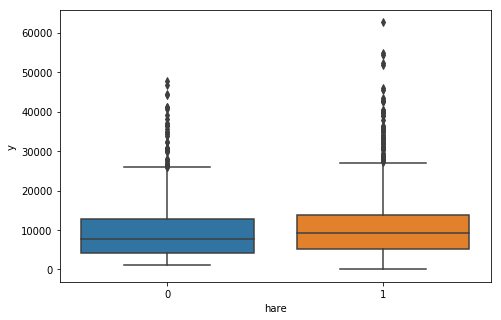

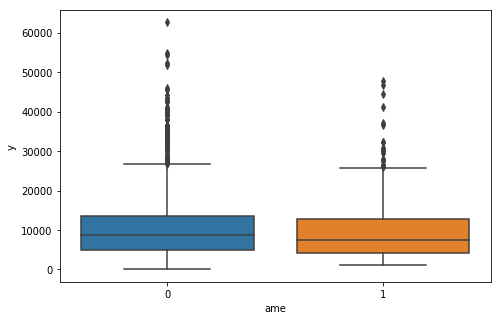

In [416]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='hare', y='y' , data=all_df2)

plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='ame', y='y' , data=all_df2)



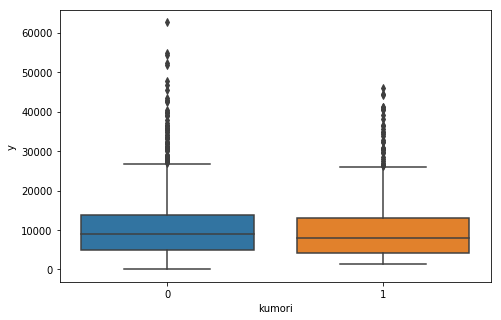

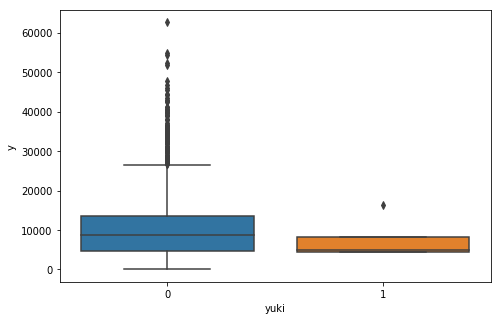

In [417]:
all_df2


plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='kumori', y='y' , data=all_df2)


plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 2)
sns.boxplot(x='yuki', y='y' , data=all_df2)


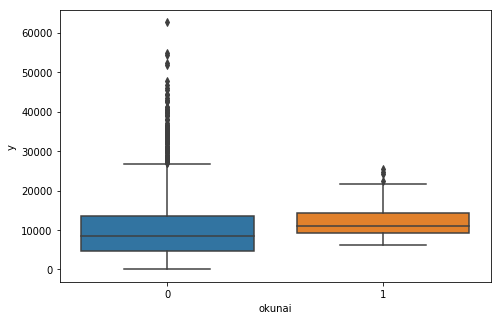

In [418]:
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='okunai', y='y' , data=all_df2)

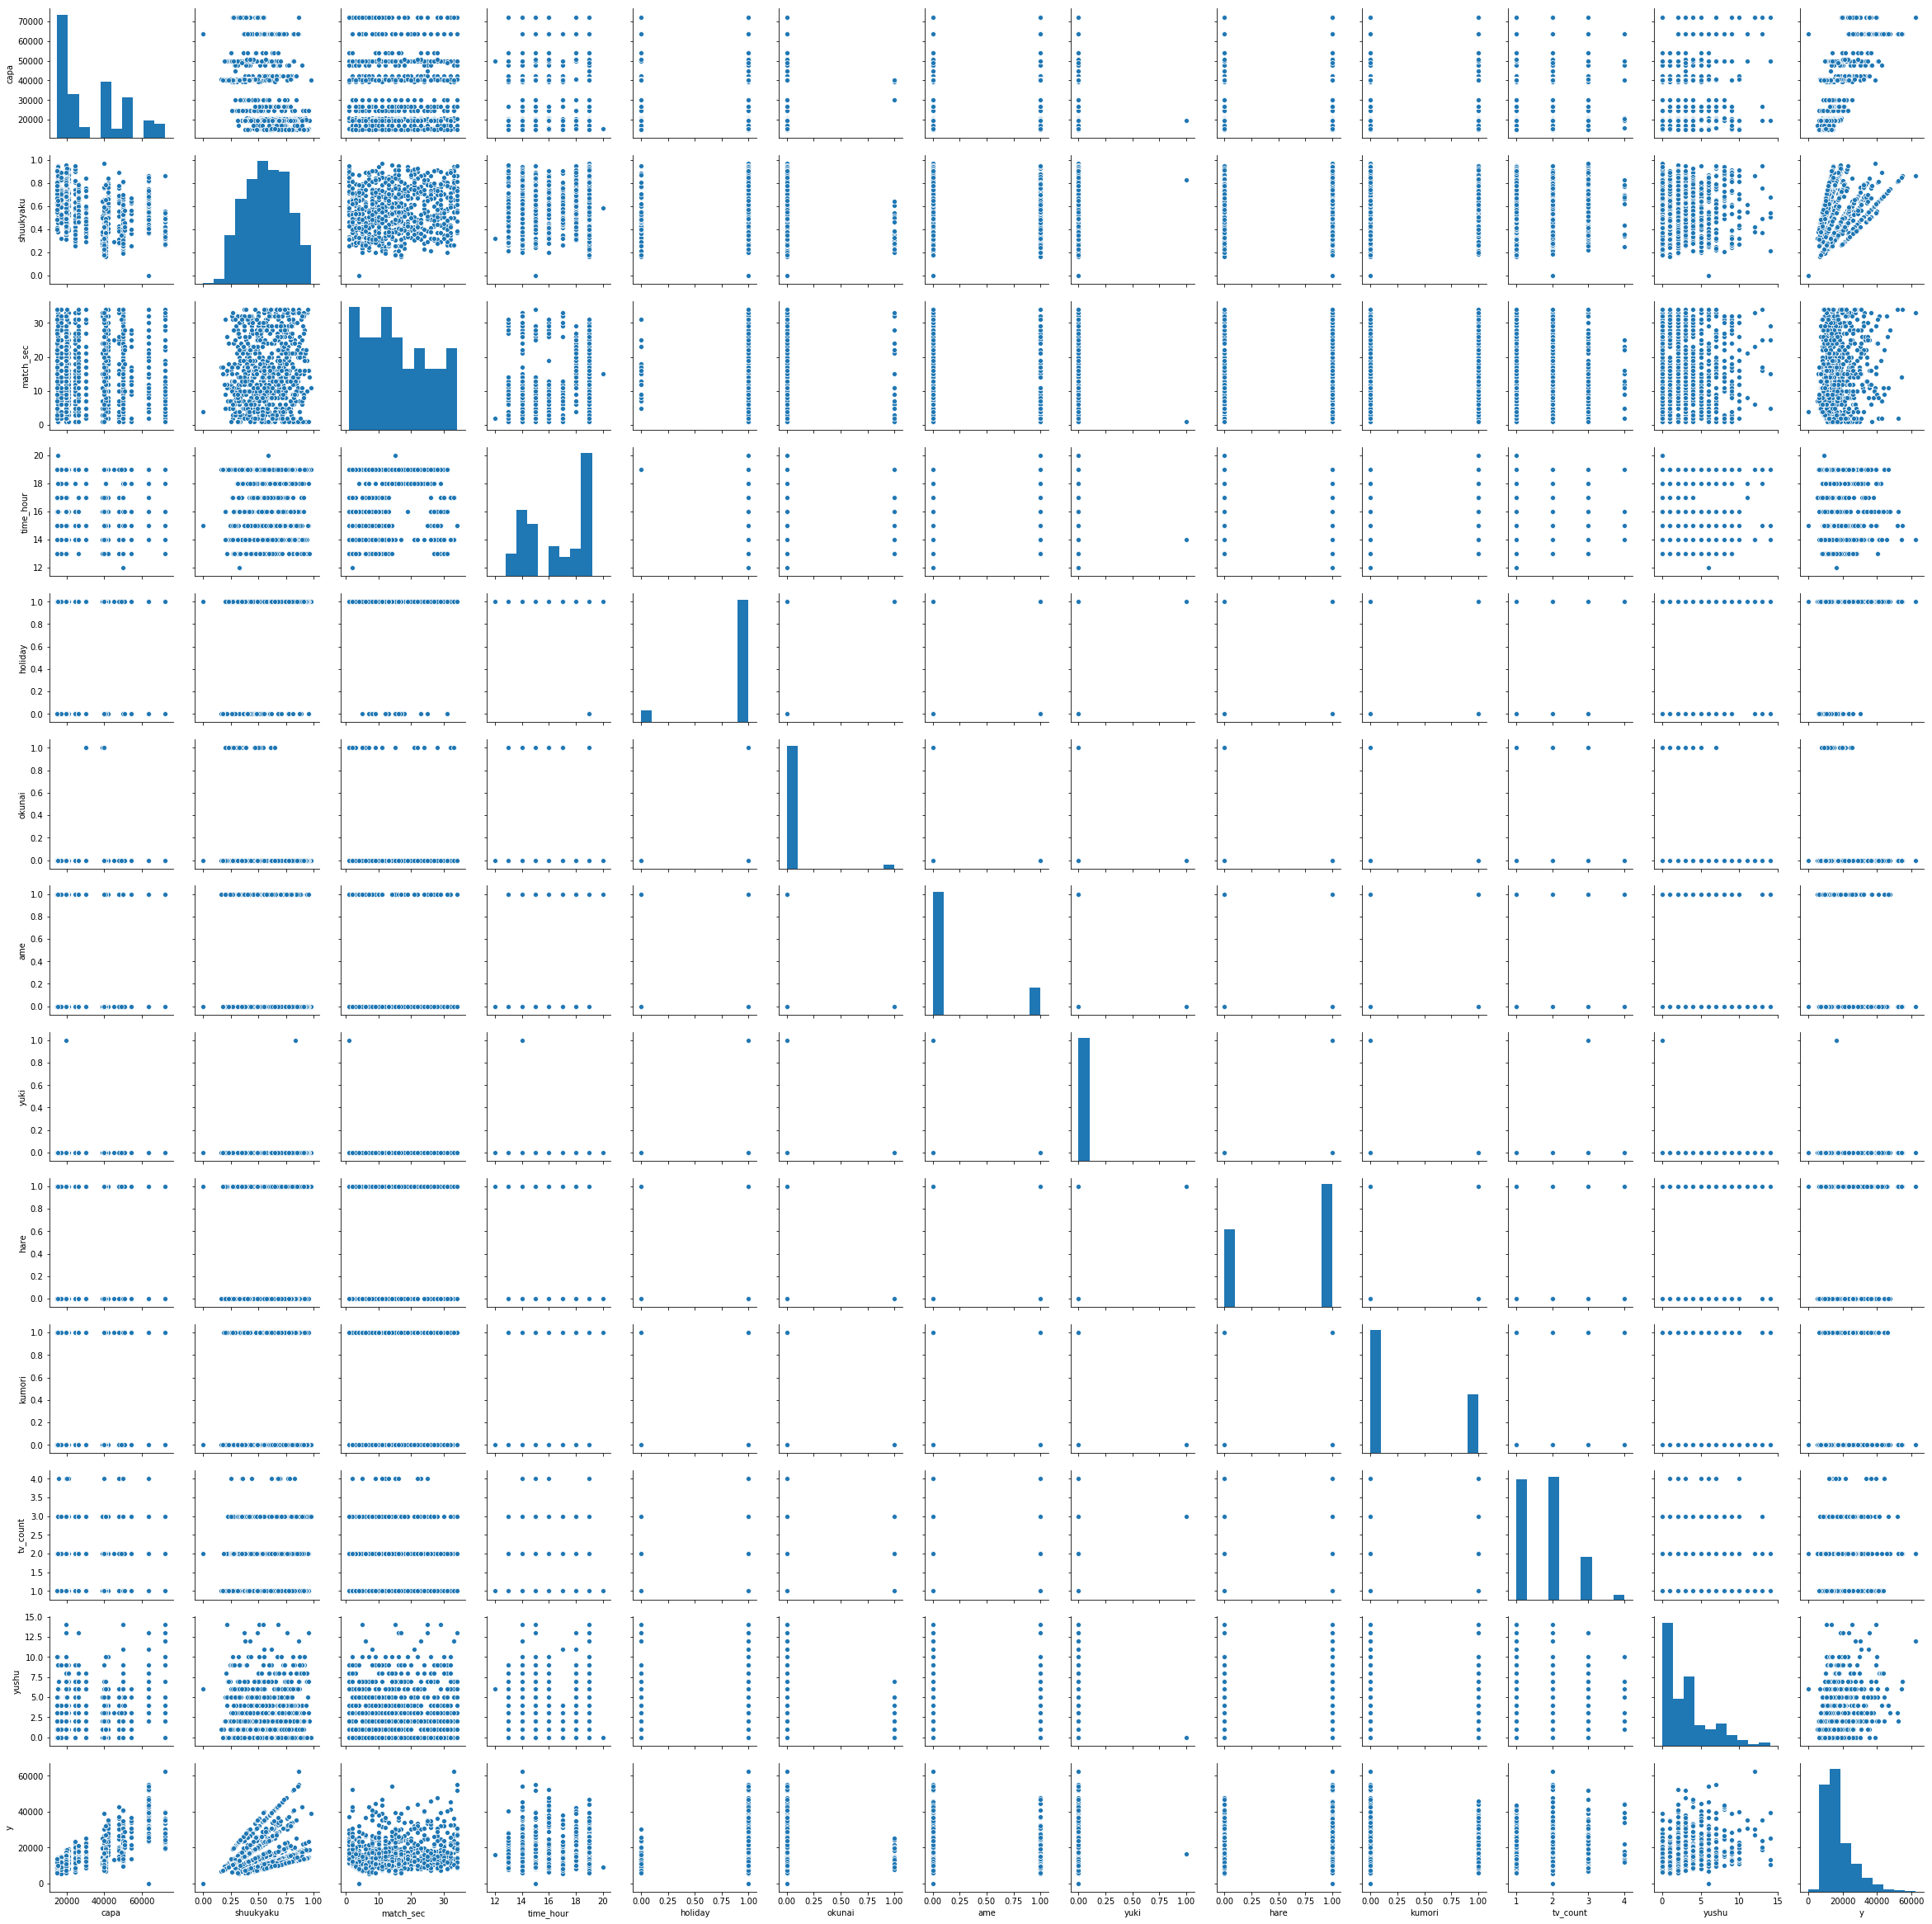

In [419]:
sns.pairplot(X.select_dtypes([np.int64, np.float64]))

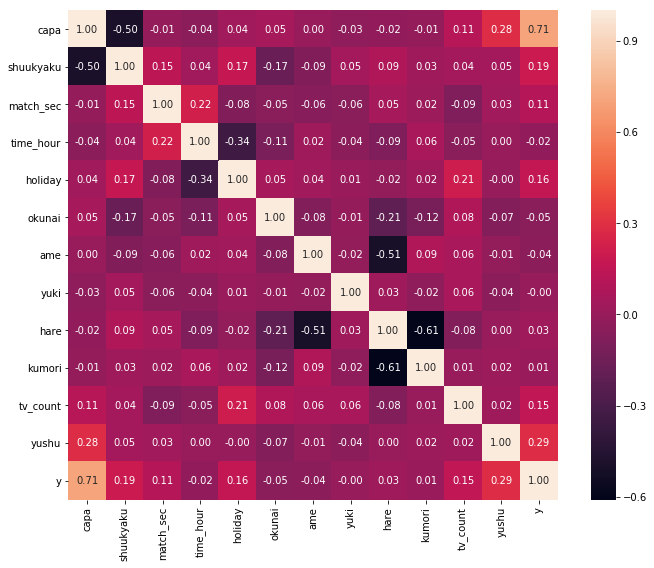

In [420]:
#ヒートマップの表示
plt.figure(figsize=(12,9))
sns.heatmap(X.corr(),annot=True,square=True,fmt=".2f")
plt.show()

In [421]:
all_df2['okunai'] = all_df2['weather'].apply(lambda x: 1 if '屋内' in x else 0)
all_df2['ame'] = all_df2['weather'].apply(lambda x: 1 if '雨' in x else 0)


In [422]:
all_df2['yuki'] = all_df2['weather'].apply(lambda x: 1 if '雪' in x else 0)
all_df2['hare'] = all_df2['weather'].apply(lambda x: 1 if '晴' in x else 0)


In [423]:

all_df2['kumori'] = all_df2['weather'].apply(lambda x: 1 if '曇' in x else 0)

all_df2["weather"]


0          雨
1       曇時々雨
2          曇
3          晴
4       曇のち雨
5          雨
6          晴
7          晴
8          曇
9          曇
10      曇一時雨
11         晴
12         曇
13         晴
14         曇
15         晴
16      晴時々雪
17      晴のち雨
18         曇
19         雨
20      曇のち雨
21         曇
22         雨
23         晴
24         晴
25         晴
26         晴
27         晴
28         曇
29         晴
        ... 
1923       晴
1924       曇
1925       曇
1926       曇
1927       晴
1928       晴
1929       曇
1930       曇
1931    晴のち曇
1932       曇
1933       曇
1934       晴
1935       晴
1936    曇のち晴
1937       晴
1938       晴
1939       曇
1940       晴
1941       晴
1942       晴
1943    晴のち曇
1944       曇
1945       晴
1946       晴
1947       晴
1948       曇
1949       晴
1950       曇
1951       雨
1952       曇
Name: weather, Length: 1953, dtype: object

In [424]:
all_df2['hare']

0       0
1       0
2       0
3       1
4       0
5       0
6       1
7       1
8       0
9       0
10      0
11      1
12      0
13      1
14      0
15      1
16      1
17      1
18      0
19      0
20      0
21      0
22      0
23      1
24      1
25      1
26      1
27      1
28      0
29      1
       ..
1923    1
1924    0
1925    0
1926    0
1927    1
1928    1
1929    0
1930    0
1931    1
1932    0
1933    0
1934    1
1935    1
1936    1
1937    1
1938    1
1939    0
1940    1
1941    1
1942    1
1943    1
1944    0
1945    1
1946    1
1947    1
1948    0
1949    1
1950    0
1951    0
1952    0
Name: hare, Length: 1953, dtype: int64

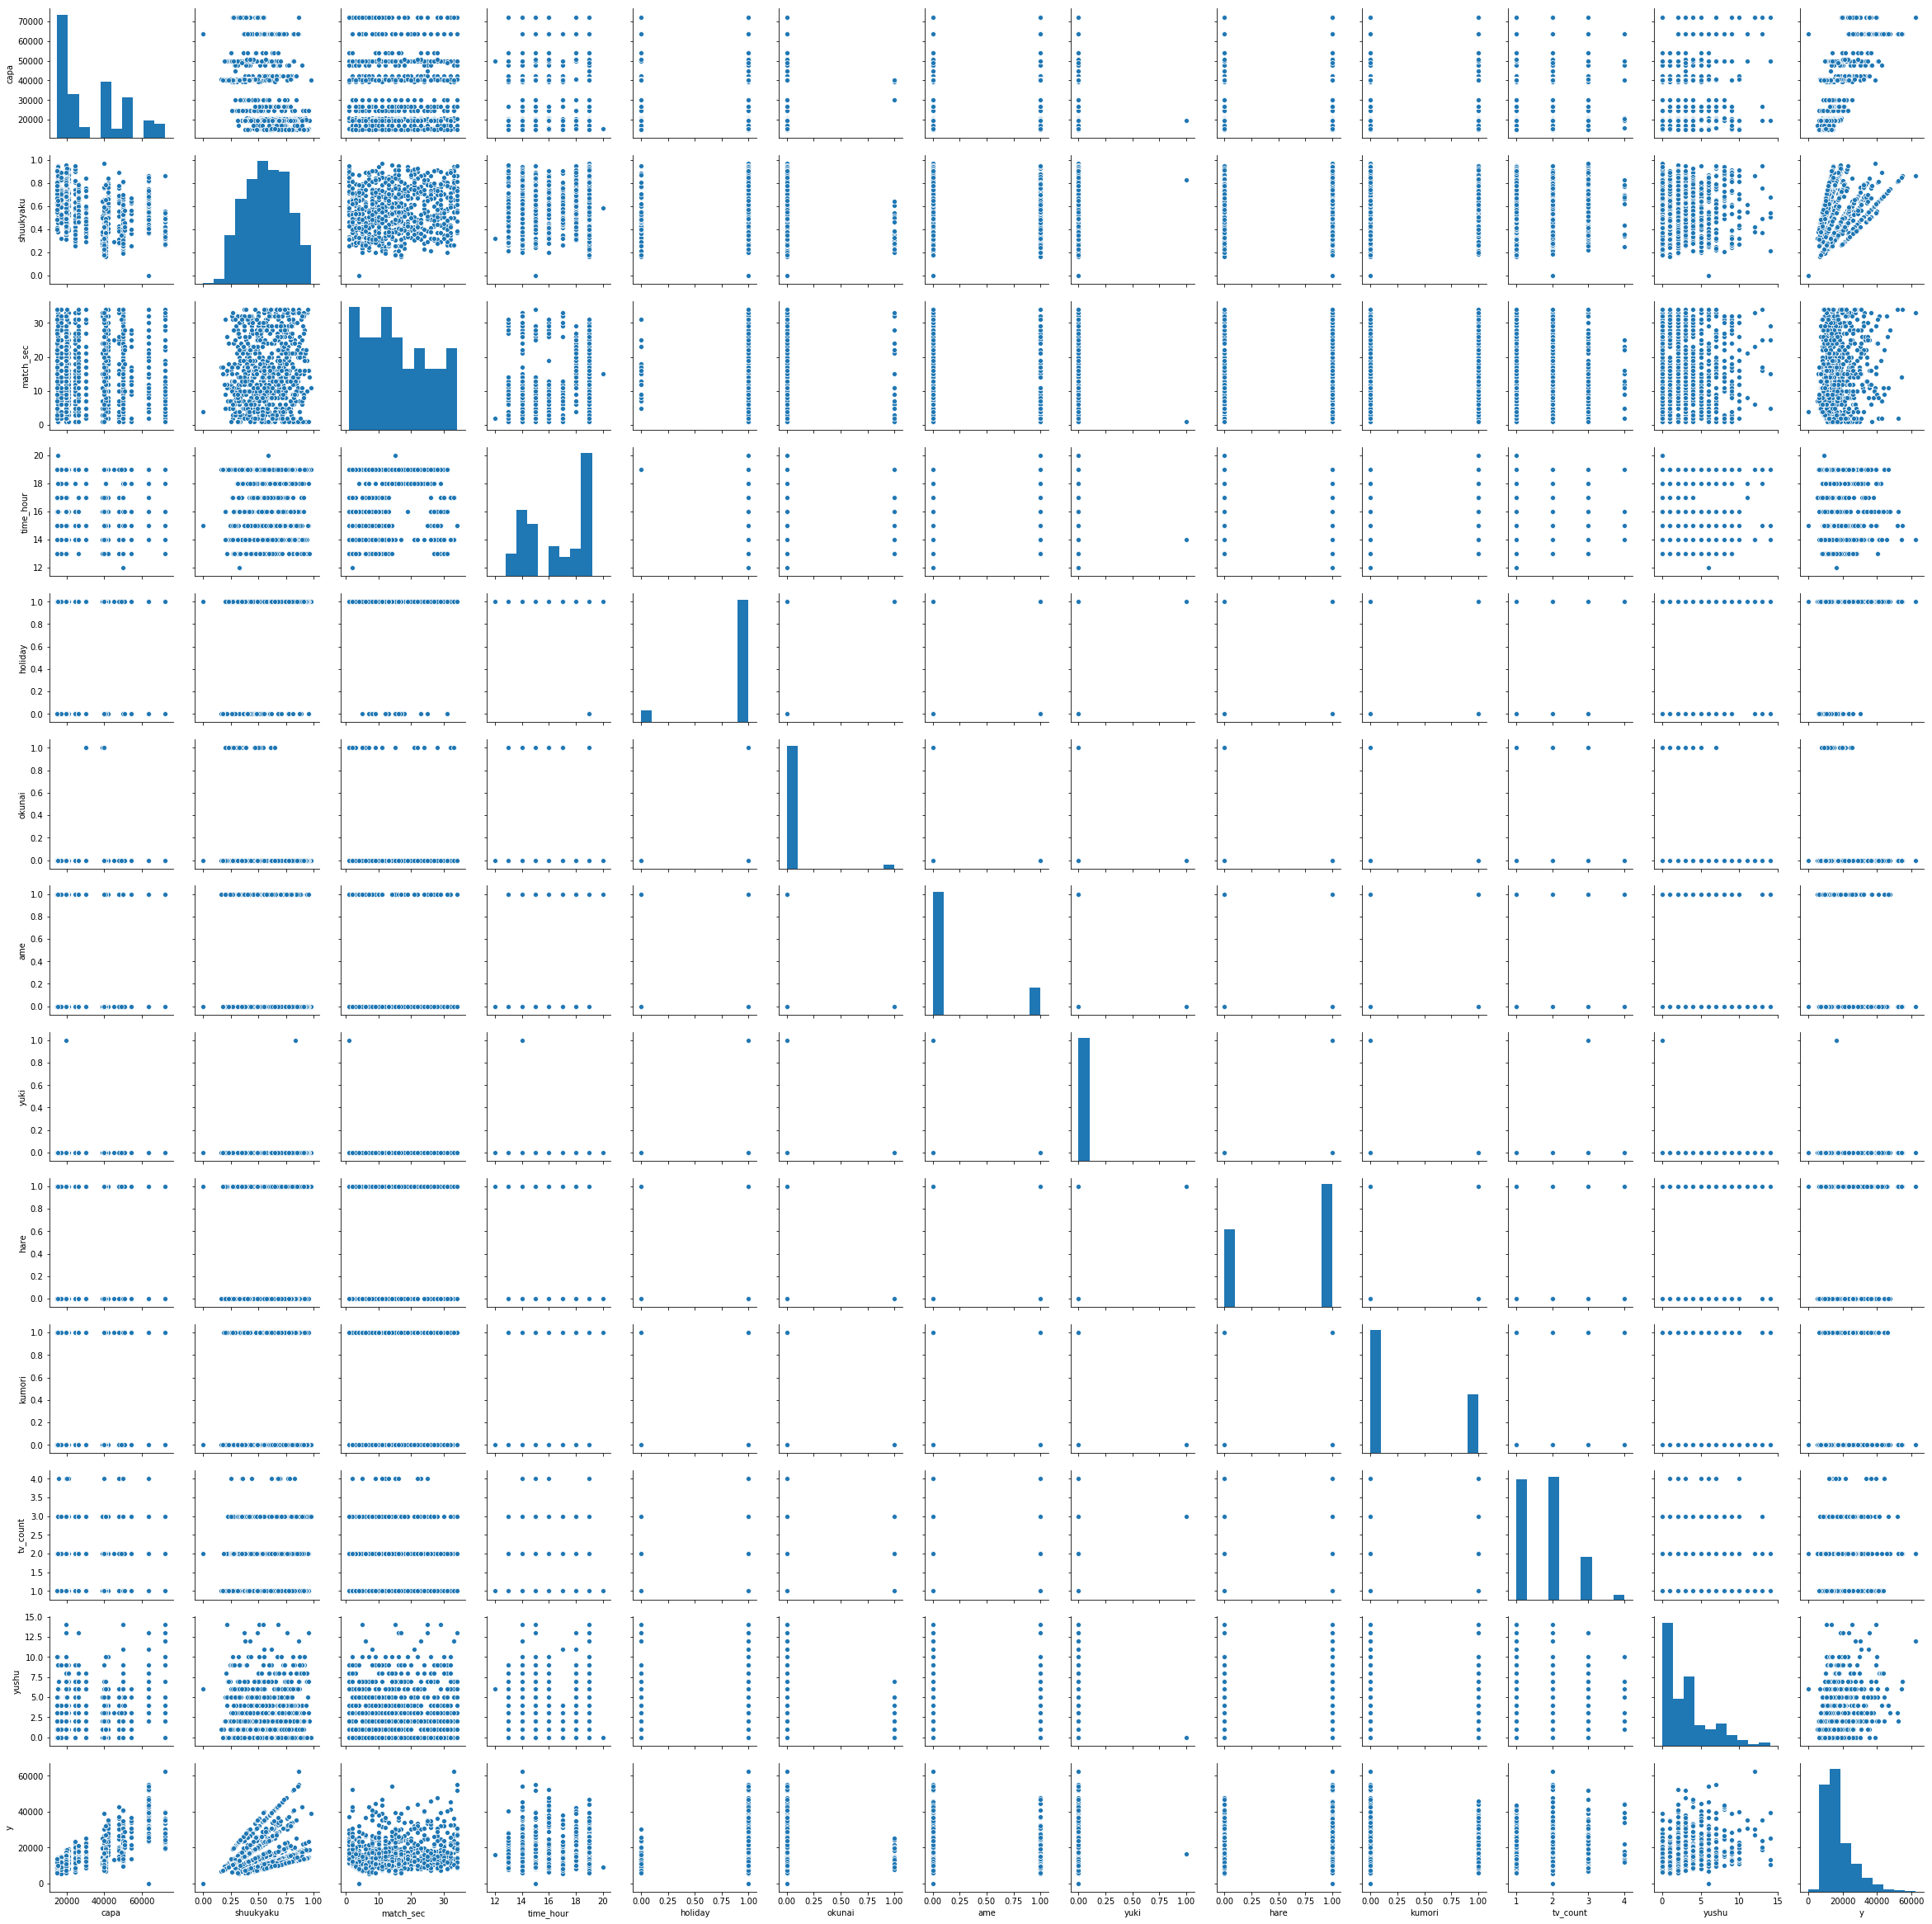

In [425]:
sns.pairplot(X.select_dtypes([np.int64, np.float64]))

In [447]:
stage_J1 =all_df2[all_df2.stage1 == 0]
stage_J2 =all_df2[all_df2.stage1 == 1]

#学習(J1,J2で分ける)
X = stage_J1.loc[:,['capa','shuukyaku','match_sec','time_hour','holiday','okunai', 'ame', 'yuki', 'hare', 'kumori','tv_count','yushu',"y"]]



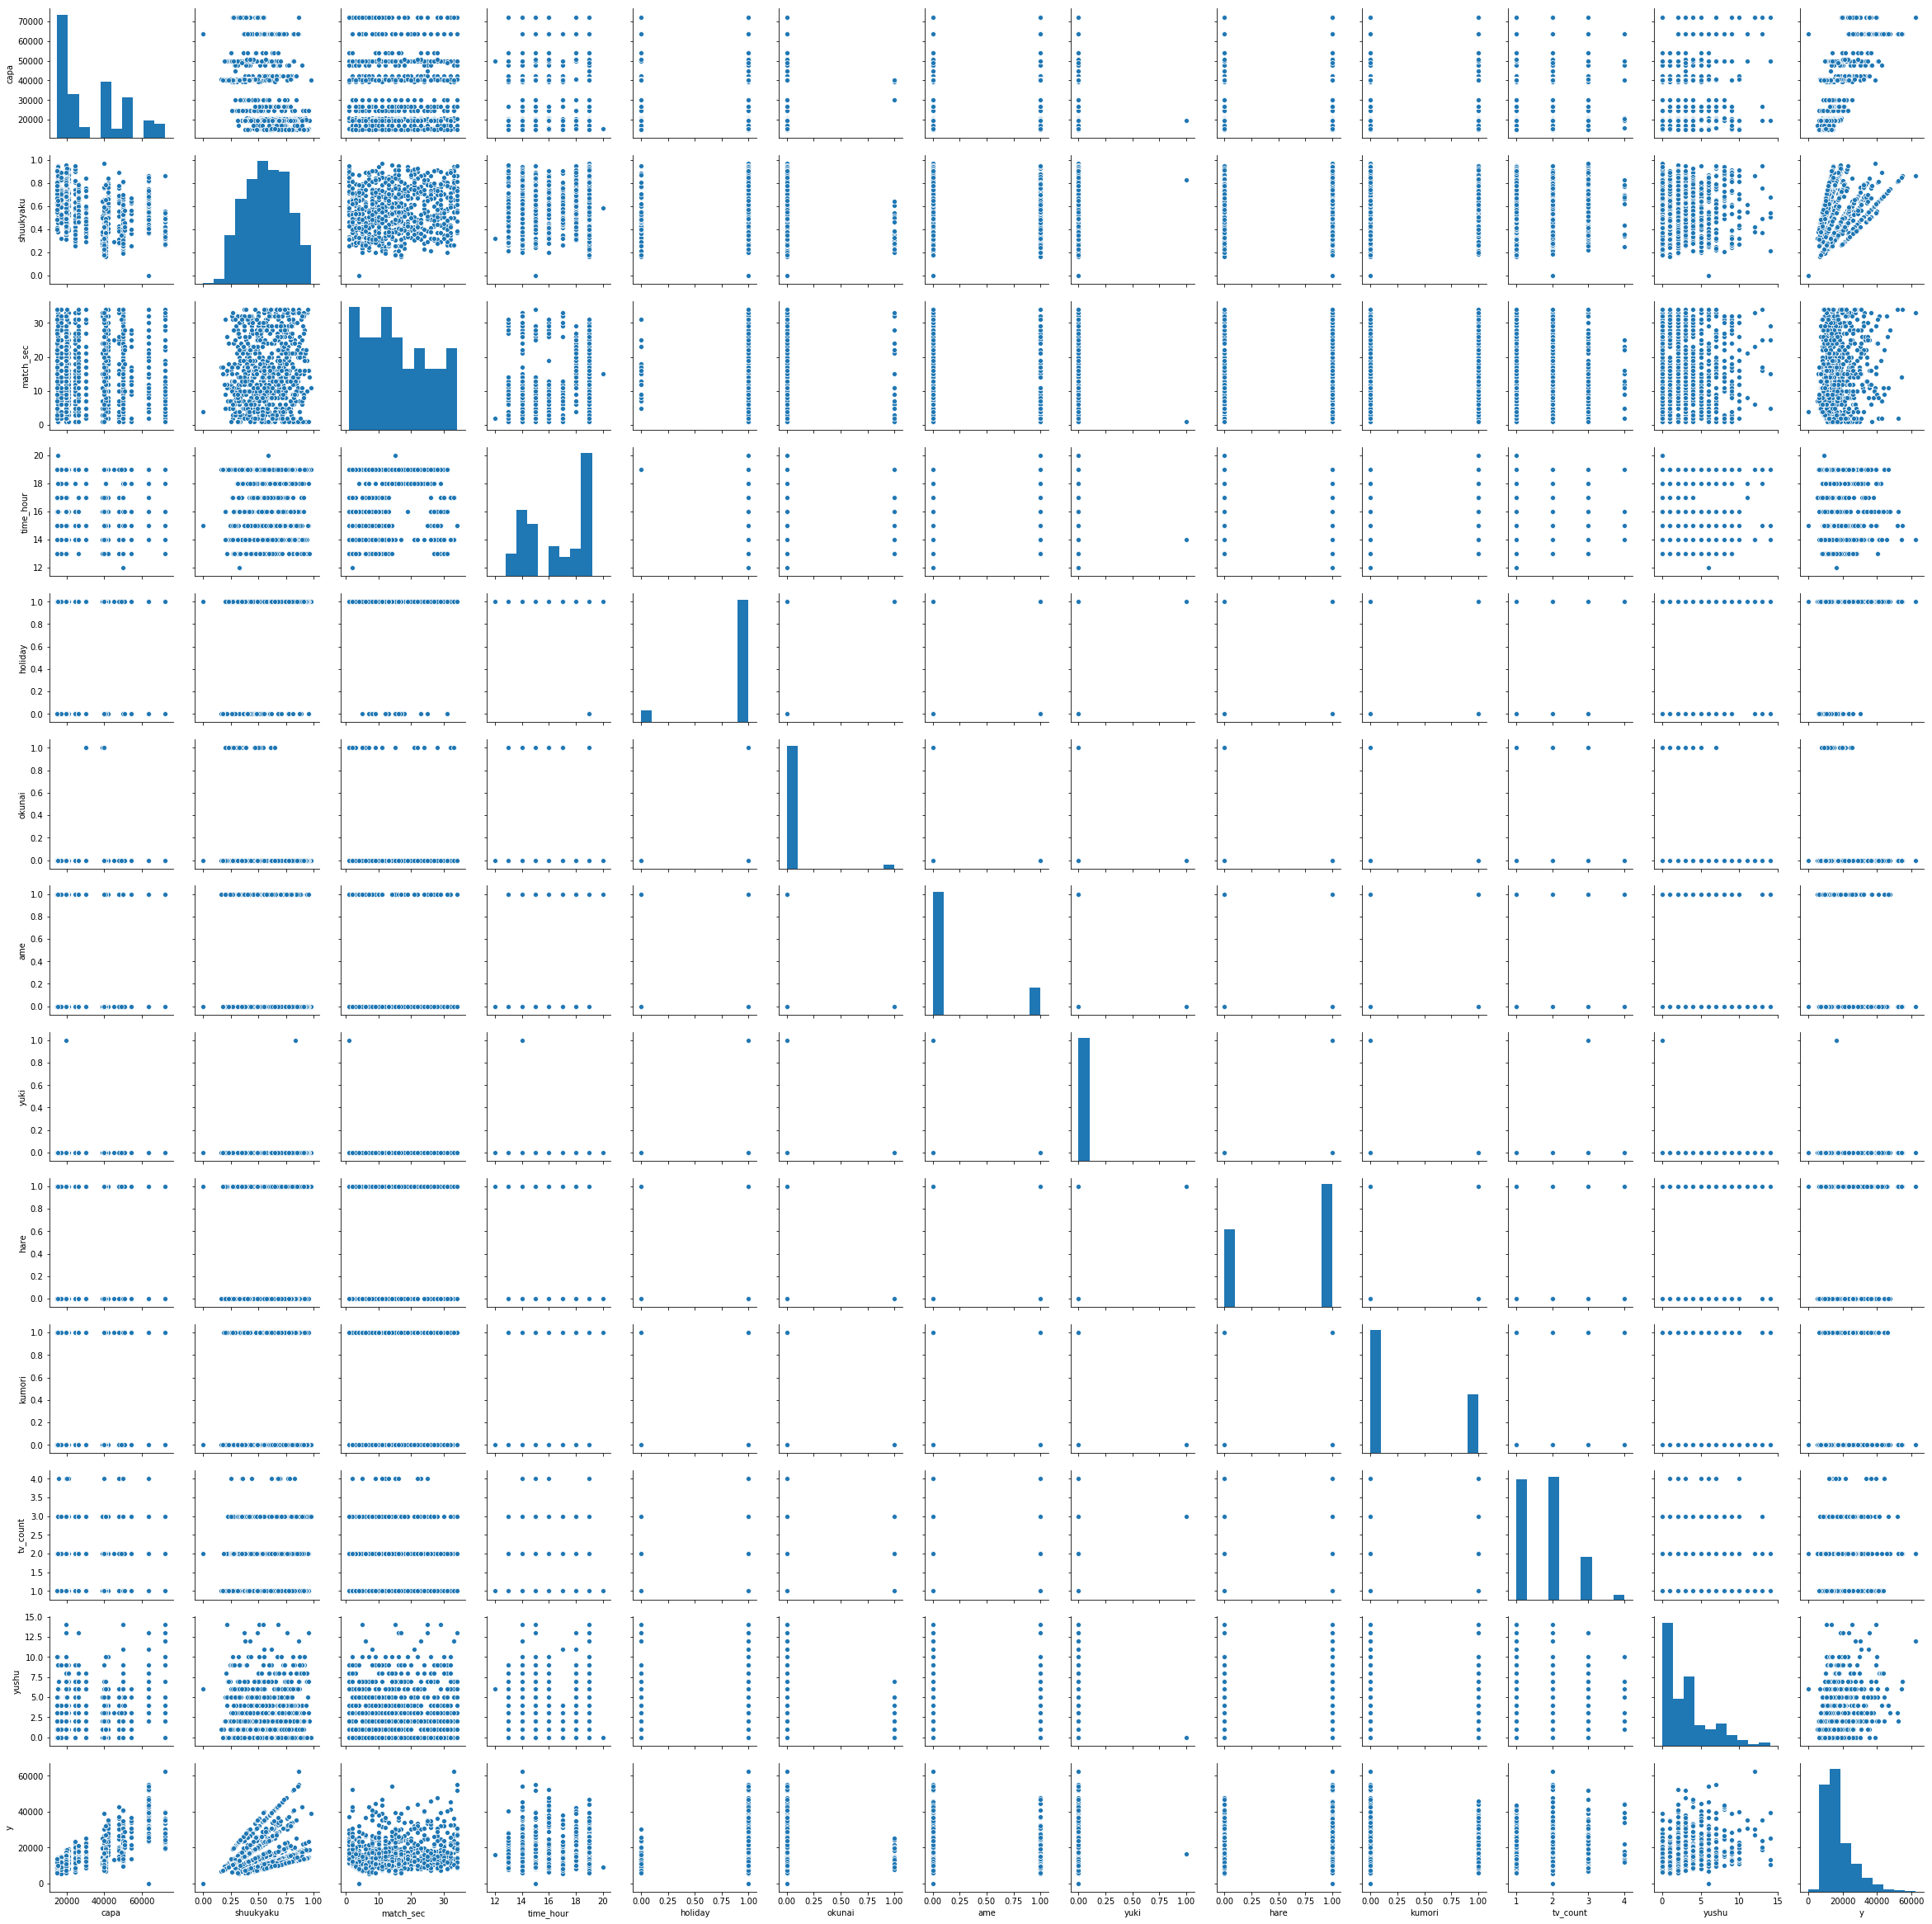

In [448]:
sns.pairplot(X.select_dtypes([np.int64, np.float64]))

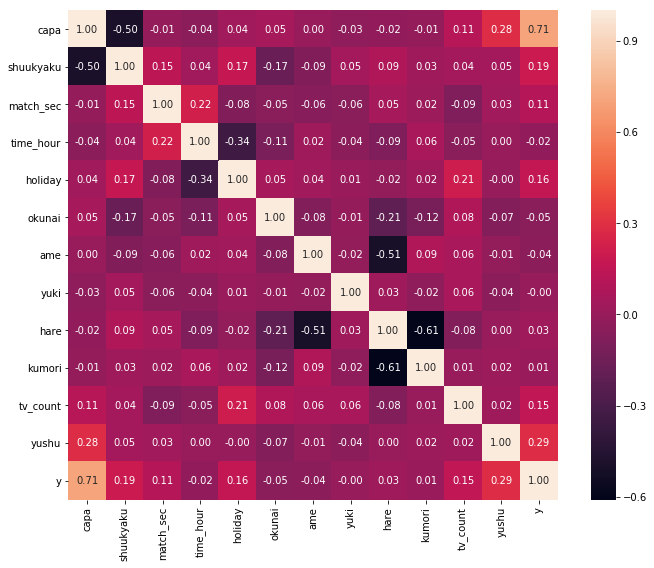

In [449]:
#ヒートマップの表示
plt.figure(figsize=(12,9))
sns.heatmap(X.corr(),annot=True,square=True,fmt=".2f")
plt.show()

In [450]:
#さらに絞る。x=capa,shukyaku,match_sec,holiday,tv_count,yushu
#y=y
X_train = X.loc[:,['capa','shuukyaku','match_sec','holiday','okunai','tv_count','yushu']]
y_train = X.loc[:,["y"]]


In [451]:
#標準化について
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_std = ss.fit_transform(X_train)
y_std = ss.fit_transform(y_train)

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [452]:
X_std[:5]

array([[-0.79978519,  1.87713927, -1.53172674,  0.30727935, -0.16800538,
         1.62800253,  1.36580567],
       [-0.79978519,  0.15471293, -1.32473664,  0.30727935, -0.16800538,
         0.30730058,  0.68401687],
       [-0.79978519,  0.5078385 , -1.11774654,  0.30727935, -0.16800538,
         2.94870447,  2.38848887],
       [-0.79978519,  1.59324348, -0.91075644,  0.30727935, -0.16800538,
         1.62800253,  1.36580567],
       [-0.79978519,  1.95093071, -0.60027129,  0.30727935, -0.16800538,
         1.62800253,  1.70670007]])

In [453]:
#平均が限りなく1に近くなっているのが分かる
X_std.mean()

3.5162245560490484e-17

In [454]:
y_std.mean()

-1.857628067346667e-17

In [455]:
#標準偏差が　1に近いことが分かる
X_std.std()

1.0

In [456]:
#標準偏差が1に近いことが分かる
y_std.std()

1.0

In [457]:
###学習
#標準化したデータで線形モデルを学習させる
from sklearn.linear_model import LinearRegression
lr_std_J1 = LinearRegression()
lr_std_J1.fit(X_std,y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [459]:
#標準編相関係数を出力
lr_std_J1.coef_

array([[ 1.09117879,  0.74023083,  0.0165188 , -0.00470455,  0.01040507,
         0.00171571, -0.05598404]])

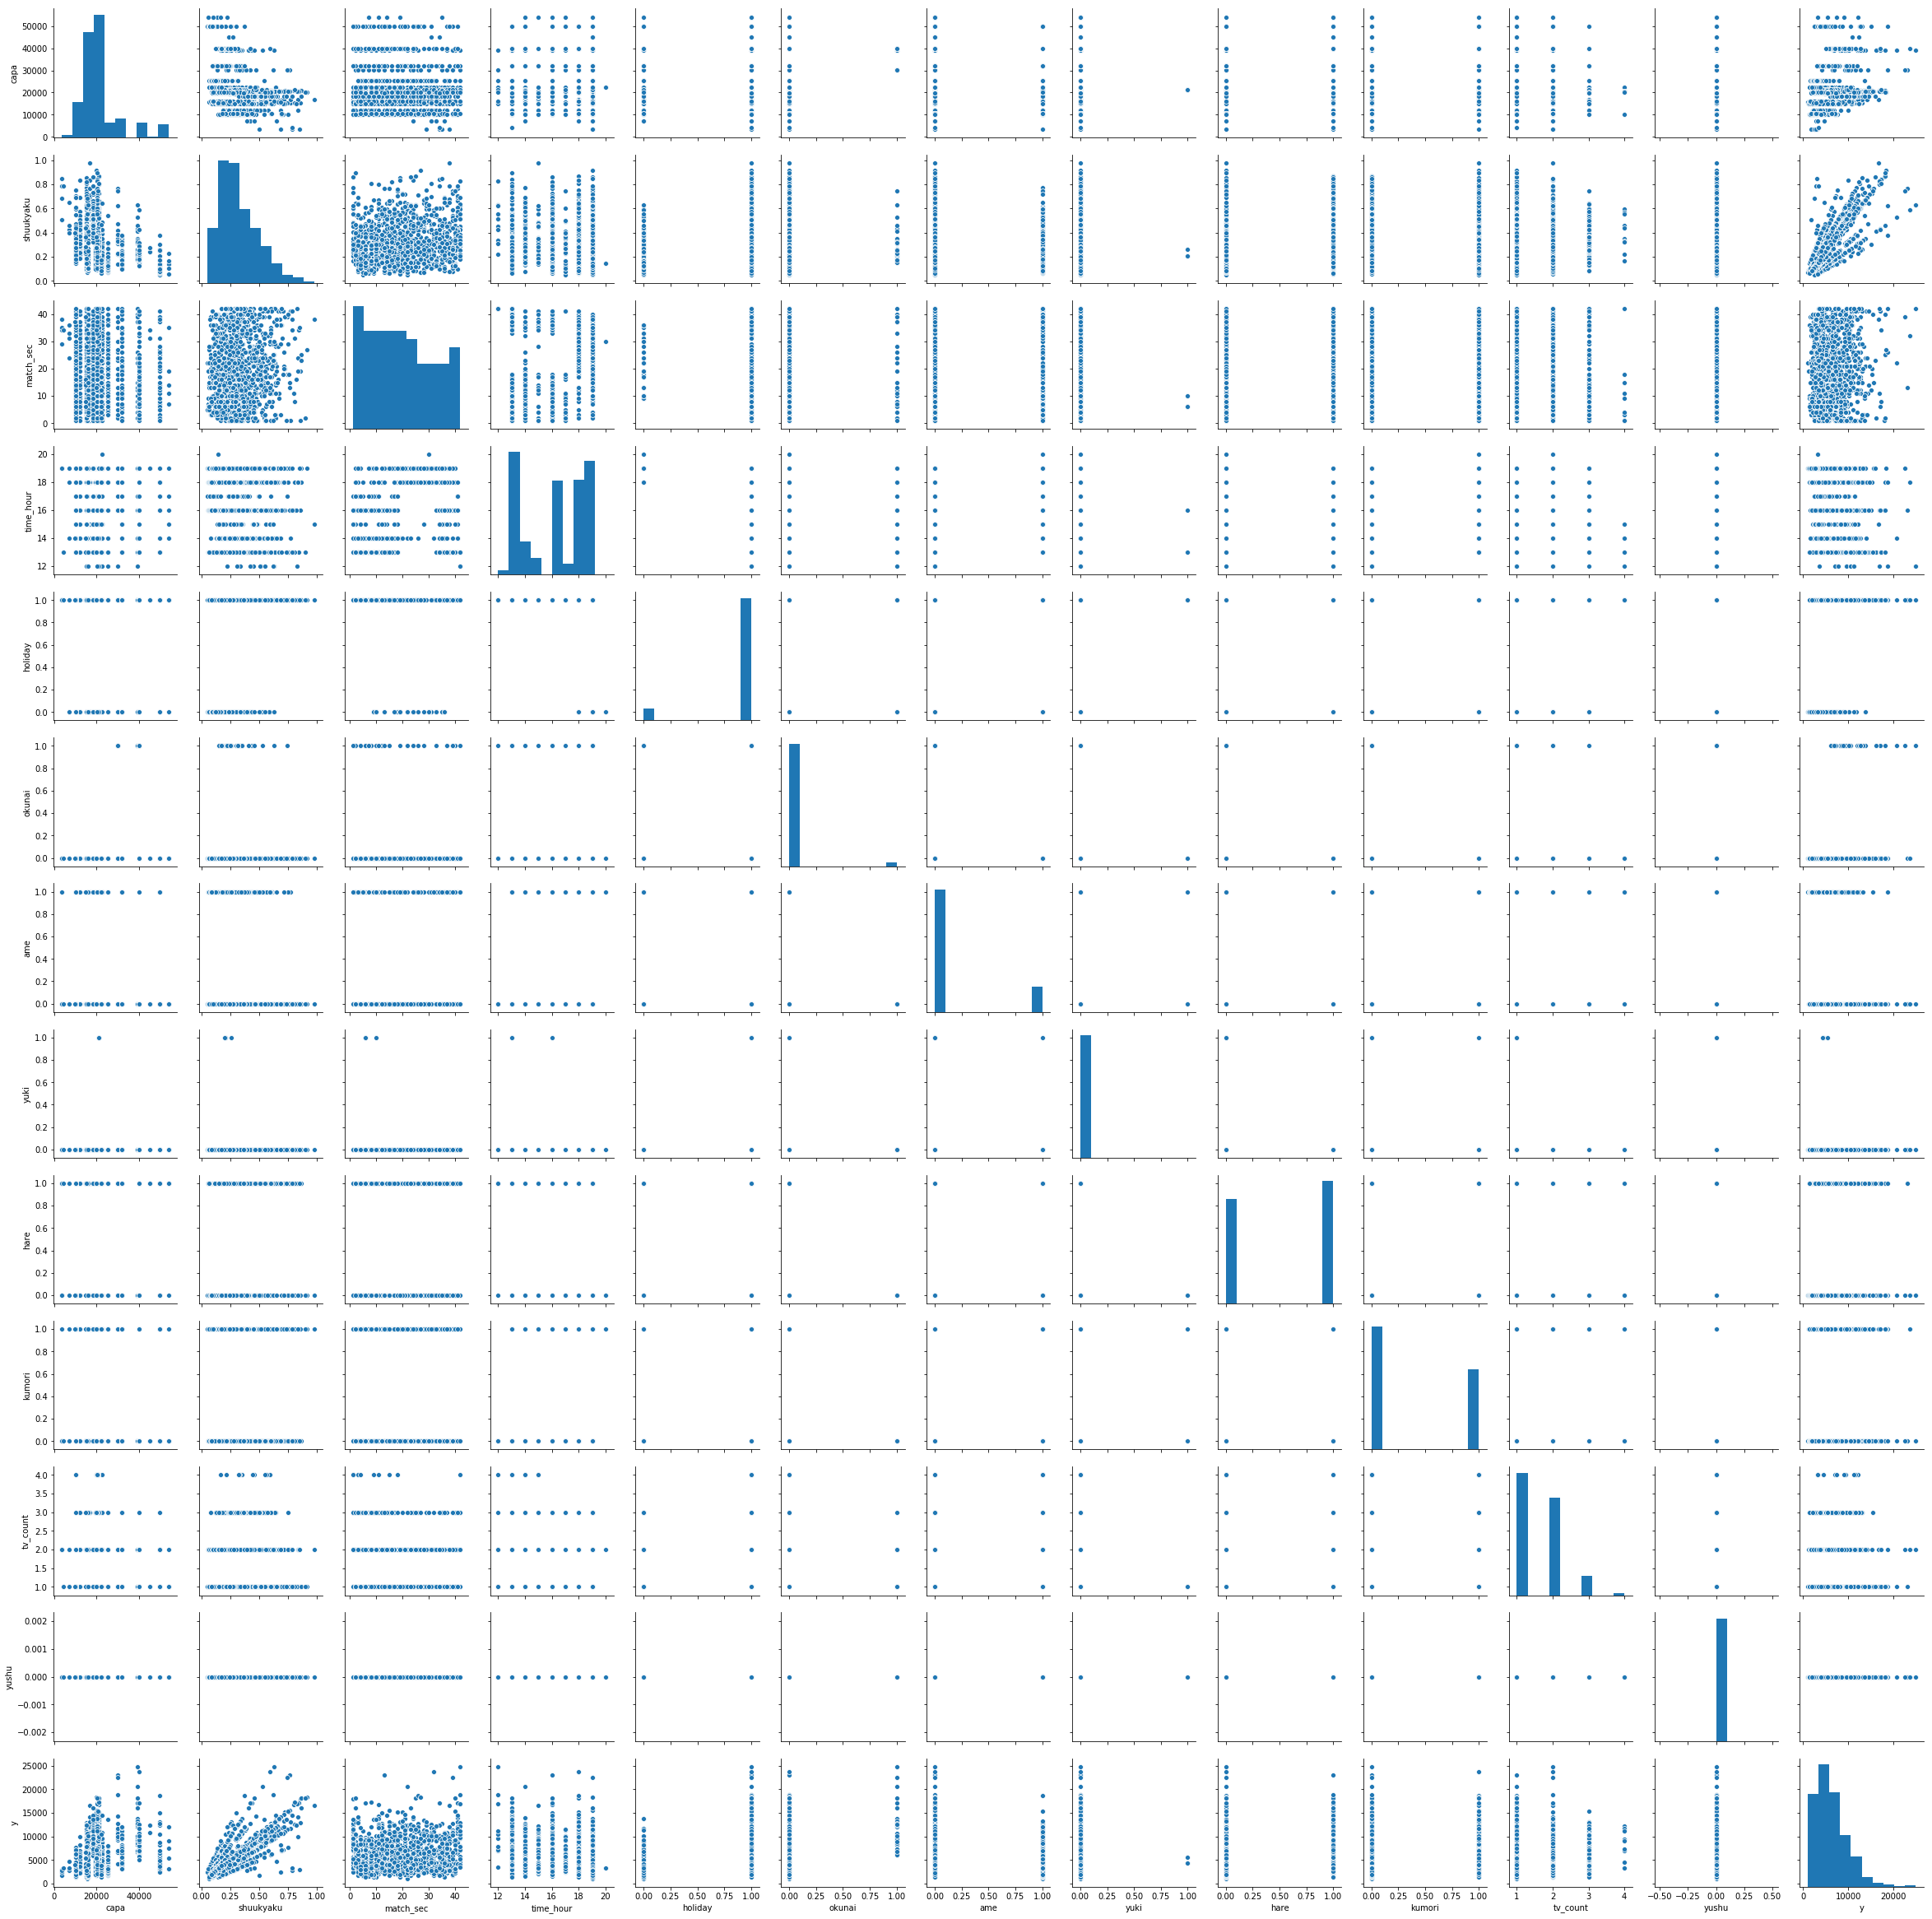

In [441]:
stage_J2 =all_df2[all_df2.stage1 == 1]

#学習(J1,J2で分ける)
X2 = stage_J2.loc[:,['capa','shuukyaku','match_sec','time_hour','holiday','okunai', 'ame', 'yuki', 'hare', 'kumori','tv_count','yushu',"y"]]
sns.pairplot(X2.select_dtypes([np.int64, np.float64]))


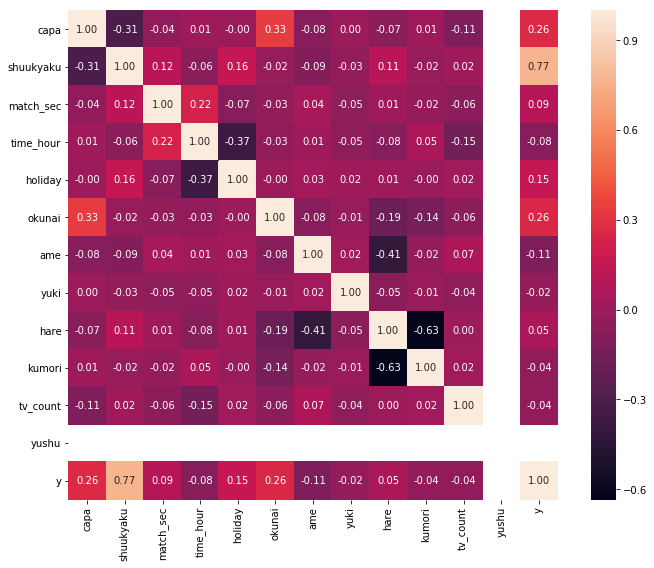

In [442]:
#ヒートマップの表示
plt.figure(figsize=(12,9))
sns.heatmap(X2.corr(),annot=True,square=True,fmt=".2f")
plt.show()

In [443]:
#J2はx:capa,shukyaku,match_sec,holiday,okunai,ame
#J2はy:y

In [445]:
X2_train = X2.loc[:,['capa','shuukyaku','match_sec','holiday','okunai','ame']]
y2_train = X2.loc[:,["y"]]

#標準化について
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X2_std = ss.fit_transform(X2_train)
y2_std = ss.fit_transform(y2_train)

###学習
#標準化したデータで線形モデルを学習させる
from sklearn.linear_model import LinearRegression
lr_std_J2 = LinearRegression()
lr_std_J2.fit(X2_std,y2_std)

/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ohnotomohiro/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [446]:
#標準編相関係数を出力
lr_std.coef_

array([[ 1.09117879,  0.74023083,  0.0165188 , -0.00470455,  0.01040507,
         0.00171571, -0.05598404]])

In [463]:
print("trainJ1: %.3f " % lr_std_J1.score(X_std,y_std))
print("trainJ2: %.3f " % lr_std_J2.score(X2_std,y2_std))


trainJ1: 0.895 
trainJ2: 0.875 


In [464]:
#testデータについて

In [467]:
df2 = pd.merge(test2 , dat_condition ,on = "id")

In [468]:
all_df2 = pd.merge(df2 ,data_stadium2 , on="stadium" )

In [470]:
all_df2["year"].unique()

array([2014])

In [471]:
all_df2.columns

Index(['id', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

In [473]:
all_df2["shuukyaku"] = all_df2["y"] / all_df2["capa"]

KeyError: 'y'

In [477]:
fanNumber = all_df.groupby(by='home').mean()['y']


In [478]:
fanNumber

home
0     15353.904762
1     17226.744186
2     13449.891304
3     16494.209302
4     10837.254902
5     12437.952381
6     17018.325581
7     10790.904762
8     12885.930233
9     36382.441860
10    24603.833333
11    25154.928571
12    19003.418605
13    14492.500000
14    11127.808511
15    13474.787234
16    24486.534884
17     5805.185185
18    15814.738095
19     5798.055556
20    11783.234043
21     4373.425926
22     5235.909091
23     8277.444444
24     5565.722222
25     9927.400000
26     3847.181818
27     8149.580000
28     3266.425926
29     4544.000000
30     3627.095238
31    10677.185185
32     4881.660000
33     3340.904762
34     3483.125000
35     6242.685185
36     7580.924528
37     3614.738095
38     6944.888889
39     4043.037037
40     9522.277778
41     5447.272727
42     3361.909091
Name: y, dtype: float64